## Data Harmonization and Insights Extraction project2

## Importing all libraries reqirued:

In [1472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

## loading Data1 CSV file in python using pandas:

In [1475]:
df1 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset_1.csv" )

In [1477]:
df1.shape

(610, 10)

In [1479]:
df1.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
5,6,01-01-2011,1,0,1,5,False,6,2,0.24


In [1481]:
df1['holiday'] = df1['weekday'].apply(lambda x: True if x == 0 or x == 6 else df1['holiday'][x])
print(df1)

     instant      dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0          1  01-01-2011       1   0     1   0     True        6           1   
1          2  01-01-2011       1   0     1   1     True        6           1   
2          3  01-01-2011       1   0     1   2     True        6           1   
3          4  01-01-2011       1   0     1   3     True        6           1   
4          5  01-01-2011       1   0     1   4     True        6           1   
..       ...         ...     ...  ..   ...  ..      ...      ...         ...   
605      606  28-01-2011       1   0     1  11    False        5           3   
606      607  28-01-2011       1   0     1  12    False        5           3   
607      608  28-01-2011       1   0     1  13    False        5           3   
608      609  28-01-2011       1   0     1  14    False        5           3   
609      610  28-01-2011       1   0     1  15    False        5           2   

     temp  
0    0.24  
1    0.22  
2  

In [1483]:
df1.rename(columns={
    'instant': 'Ride_id',
    'dteday': 'Date',
    'yr' : 'Year',
    'mnth' :'Month',
    'hr' :'Hour',
     'holiday' :'Holiday',
    'season': 'Season_type',
    'weekday': 'Weekday',
    'weathersit': 'Weather',
    'temp': 'Temperature',
}, inplace=True)
df1['Weather'] = df1['Weather'].replace({1:'Clear, Partly cloudy', 2:'Misty, Cloudy',3:'Light Rain,Thunderstorm',
                                       4: 'Heavy Rain, Ice Pallets'})
df1['Weekday'] = df1['Weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
print(df1)

     Ride_id        Date  Season_type  Year  Month  Hour  Holiday   Weekday  \
0          1  01-01-2011            1     0      1     0     True  Saturday   
1          2  01-01-2011            1     0      1     1     True  Saturday   
2          3  01-01-2011            1     0      1     2     True  Saturday   
3          4  01-01-2011            1     0      1     3     True  Saturday   
4          5  01-01-2011            1     0      1     4     True  Saturday   
..       ...         ...          ...   ...    ...   ...      ...       ...   
605      606  28-01-2011            1     0      1    11    False    Friday   
606      607  28-01-2011            1     0      1    12    False    Friday   
607      608  28-01-2011            1     0      1    13    False    Friday   
608      609  28-01-2011            1     0      1    14    False    Friday   
609      610  28-01-2011            1     0      1    15    False    Friday   

                     Weather  Temperature  
0      

In [1485]:
df1['Month'] = df1['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
                 10: 'October', 11: 'November', 12: 'December'})
df1['Season_type'] = df1['Season_type'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
print(df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring     0  January     0     True  Saturday   
1          2  01-01-2011      Spring     0  January     1     True  Saturday   
2          3  01-01-2011      Spring     0  January     2     True  Saturday   
3          4  01-01-2011      Spring     0  January     3     True  Saturday   
4          5  01-01-2011      Spring     0  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring     0  January    11    False    Friday   
606      607  28-01-2011      Spring     0  January    12    False    Friday   
607      608  28-01-2011      Spring     0  January    13    False    Friday   
608      609  28-01-2011      Spring     0  January    14    False    Friday   
609      610  28-01-2011      Spring     0  January    15    False    Friday   

                     Weather  Temperatu

In [1486]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ride_id      610 non-null    int64  
 1   Date         610 non-null    object 
 2   Season_type  610 non-null    object 
 3   Year         610 non-null    int64  
 4   Month        610 non-null    object 
 5   Hour         610 non-null    int64  
 6   Holiday      610 non-null    bool   
 7   Weekday      610 non-null    object 
 8   Weather      610 non-null    object 
 9   Temperature  610 non-null    float64
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 43.6+ KB


In [1489]:
Year_mapping = {0: 2011,1: 2012}
df1['Year'] = df1['Year'].map(Year_mapping)
print(df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring  2011  January     0     True  Saturday   
1          2  01-01-2011      Spring  2011  January     1     True  Saturday   
2          3  01-01-2011      Spring  2011  January     2     True  Saturday   
3          4  01-01-2011      Spring  2011  January     3     True  Saturday   
4          5  01-01-2011      Spring  2011  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring  2011  January    11    False    Friday   
606      607  28-01-2011      Spring  2011  January    12    False    Friday   
607      608  28-01-2011      Spring  2011  January    13    False    Friday   
608      609  28-01-2011      Spring  2011  January    14    False    Friday   
609      610  28-01-2011      Spring  2011  January    15    False    Friday   

                     Weather  Temperatu

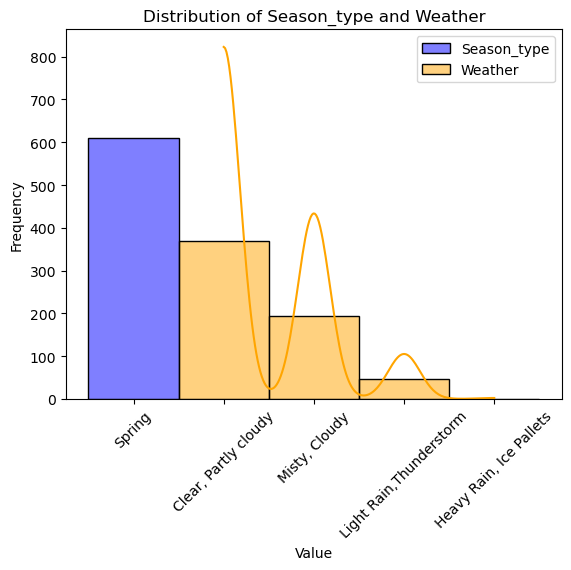

In [1491]:
sns.histplot(data=df1, x="Season_type", kde=True, color="blue", label="Season_type")
sns.histplot(data=df1, x="Weather", kde=True, color="orange", label="Weather")
plt.legend()
plt.xticks(rotation=45)
plt.title("Distribution of Season_type and Weather")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

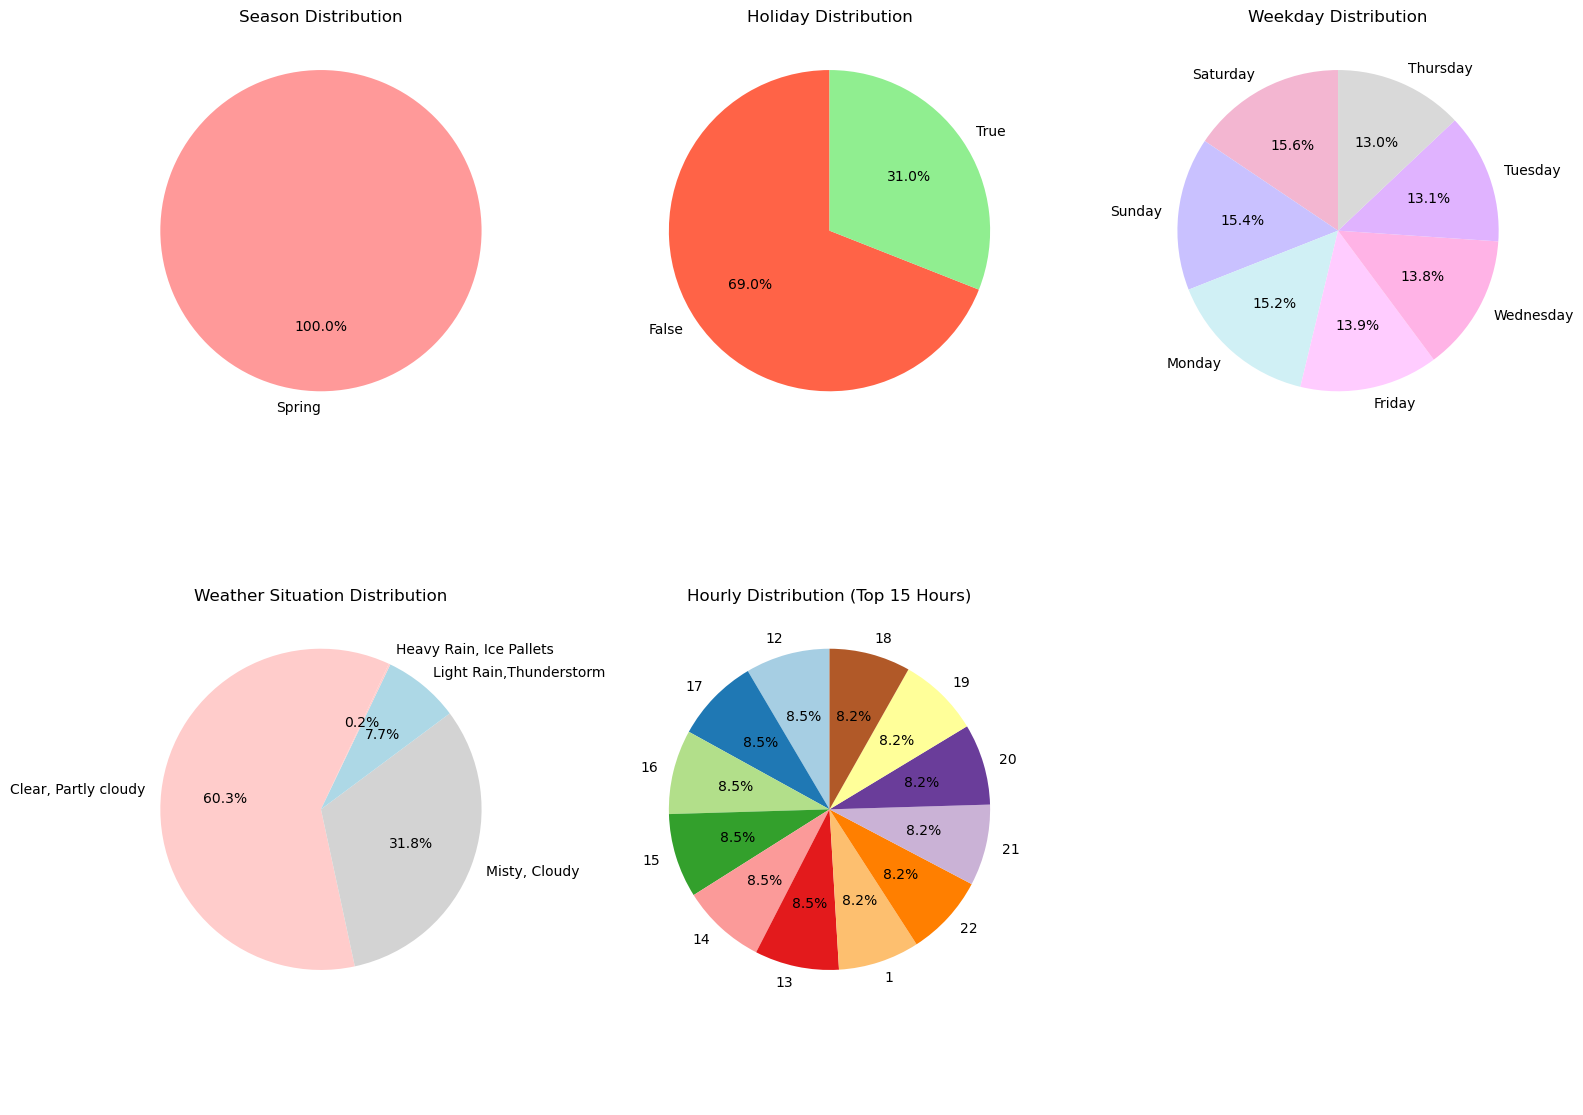

In [1492]:
data = {
    'Date': pd.date_range(start='2011-01-01', periods=610, freq='H'),
    'Season_type': [1]*610,
    'Hour': [i%24 for i in range(610)],
    'Holiday': [0, 1]*305,
    'Weekday': [i%7 for i in range(610)],
    'Weather': [1]*610,
    'Temperature': [ 0.24 + (i%3) * 0.01 for i in range(610)]
}

df = pd.DataFrame(data)

# Create a 2-row layout for pie charts
fig, axes = plt.subplots(2, 3, figsize=(16, 12))  # 2 rows, 3 columns

# Pie Chart for 'season' (distribution of seasons)
Season_type_counts = df1['Season_type'].value_counts()
axes[0, 0].pie(Season_type_counts, labels=Season_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[0, 0].set_title('Season Distribution')

# Pie Chart for 'Holiday' (Holiday vs. Non-Holiday)
Holiday_counts = df1['Holiday'].value_counts()
axes[0, 1].pie(Holiday_counts, labels=Holiday_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff6347', '#90ee90'])
axes[0, 1].set_title('Holiday Distribution')

# Pie Chart for 'Weekday' (distribution of weekdays)
Weekday_counts = df1['Weekday'].value_counts()
axes[0, 2].pie(Weekday_counts, labels=Weekday_counts.index, autopct='%1.1f%%', startangle=90, colors=['#f3b6d1', '#c9c1ff', '#d0f0f5', '#ffccff', '#ffb3e6', '#e0b3ff', '#d9d9d9'])
axes[0, 2].set_title('Weekday Distribution')

# Pie Chart for 'Weather' (distribution of weather situations)
Weather_counts = df1['Weather'].value_counts()
axes[1, 0].pie(Weather_counts, labels=Weather_counts.index, autopct='%1.1f%%', startangle=65, colors=['#ffcccb', '#d3d3d3', '#add8e6'])
axes[1, 0].set_title('Weather Situation Distribution')

# Pie Chart for 'Hour' (Top 12 hours distribution for visualization clarity)
Hour_counts = df1['Hour'].value_counts().head(12)
axes[1, 1].pie(Hour_counts, labels=Hour_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1, 1].set_title('Hourly Distribution (Top 15 Hours)')

# Placeholder empty chart for the last position
axes[1, 2].axis('off')  # No plot in this position
axes[1, 2].set_title('')  # Blank title

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


### After preprocessing data1 importing data into CSV file:

In [1495]:
from IPython.display import FileLink

df1.to_csv('preprocessed_data.csv', index=False)
FileLink('preprocessed_data.csv')

C:\Users\Admin\NEXTHIKES PROJECT\preprocessed_data.csv

## loading Data2 CSV file in python  using pandas:

In [1497]:
df2 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset_2.csv" )

In [1500]:
df2.shape

(610, 8)

In [1502]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [1505]:
df2.rename(columns={
    'instant': 'Ride_id',
    'atemp': 'ATemperature',
    'hum': 'Relative humidity',
    'windspeed': 'Windspeed',
    'casual' :'Non-registered rentals',
    'registered': 'Registered rentals',
    'cnt': 'Total rentals',
}, inplace=True)
print(df2)

     Ride_id  ATemperature  Relative humidity  Windspeed  \
0          1        0.2879               0.81     0.0000   
1          2        0.2727               0.80     0.0000   
2          3        0.2727               0.80     0.0000   
3          4        0.2879               0.75     0.0000   
4          5        0.2879               0.75     0.0000   
..       ...           ...                ...        ...   
605      606        0.2121               0.93     0.1045   
606      607        0.2121               0.93     0.1045   
607      608        0.2121               0.93     0.1045   
608      609        0.2727               0.80     0.0000   
609      610        0.2576               0.86     0.0000   

     Non-registered rentals  Registered rentals  Total rentals  
0                         3                  13             16  
1                         8                  32             40  
2                         5                  27             32  
3                  

In [1507]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_id                 610 non-null    int64  
 1   ATemperature            599 non-null    float64
 2   Relative humidity       610 non-null    float64
 3   Windspeed               610 non-null    float64
 4   Non-registered rentals  610 non-null    int64  
 5   Registered rentals      610 non-null    int64  
 6   Total rentals           610 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 33.5 KB


In [1509]:
print("Missing values before handling:")
print(df2.isnull().sum())

Missing values before handling:
Ride_id                    0
ATemperature              11
Relative humidity          0
Windspeed                  0
Non-registered rentals     0
Registered rentals         0
Total rentals              0
dtype: int64


In [1511]:
l = df2["ATemperature"].median()
l

0.197

In [1513]:
df2["ATemperature"] = df2["ATemperature"].replace(np.nan,0.197)
df2

,Ride_id,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
0,1,0.2879,0.81,0.0000,3,13,16
1,2,0.2727,0.80,0.0000,8,32,40
2,3,0.2727,0.80,0.0000,5,27,32
3,4,0.2879,0.75,0.0000,3,10,13
4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
605,606,0.2121,0.93,0.1045,0,30,30
606,607,0.2121,0.93,0.1045,1,28,29
607,608,0.2121,0.93,0.1045,0,31,31
608,609,0.2727,0.80,0.0000,2,36,38


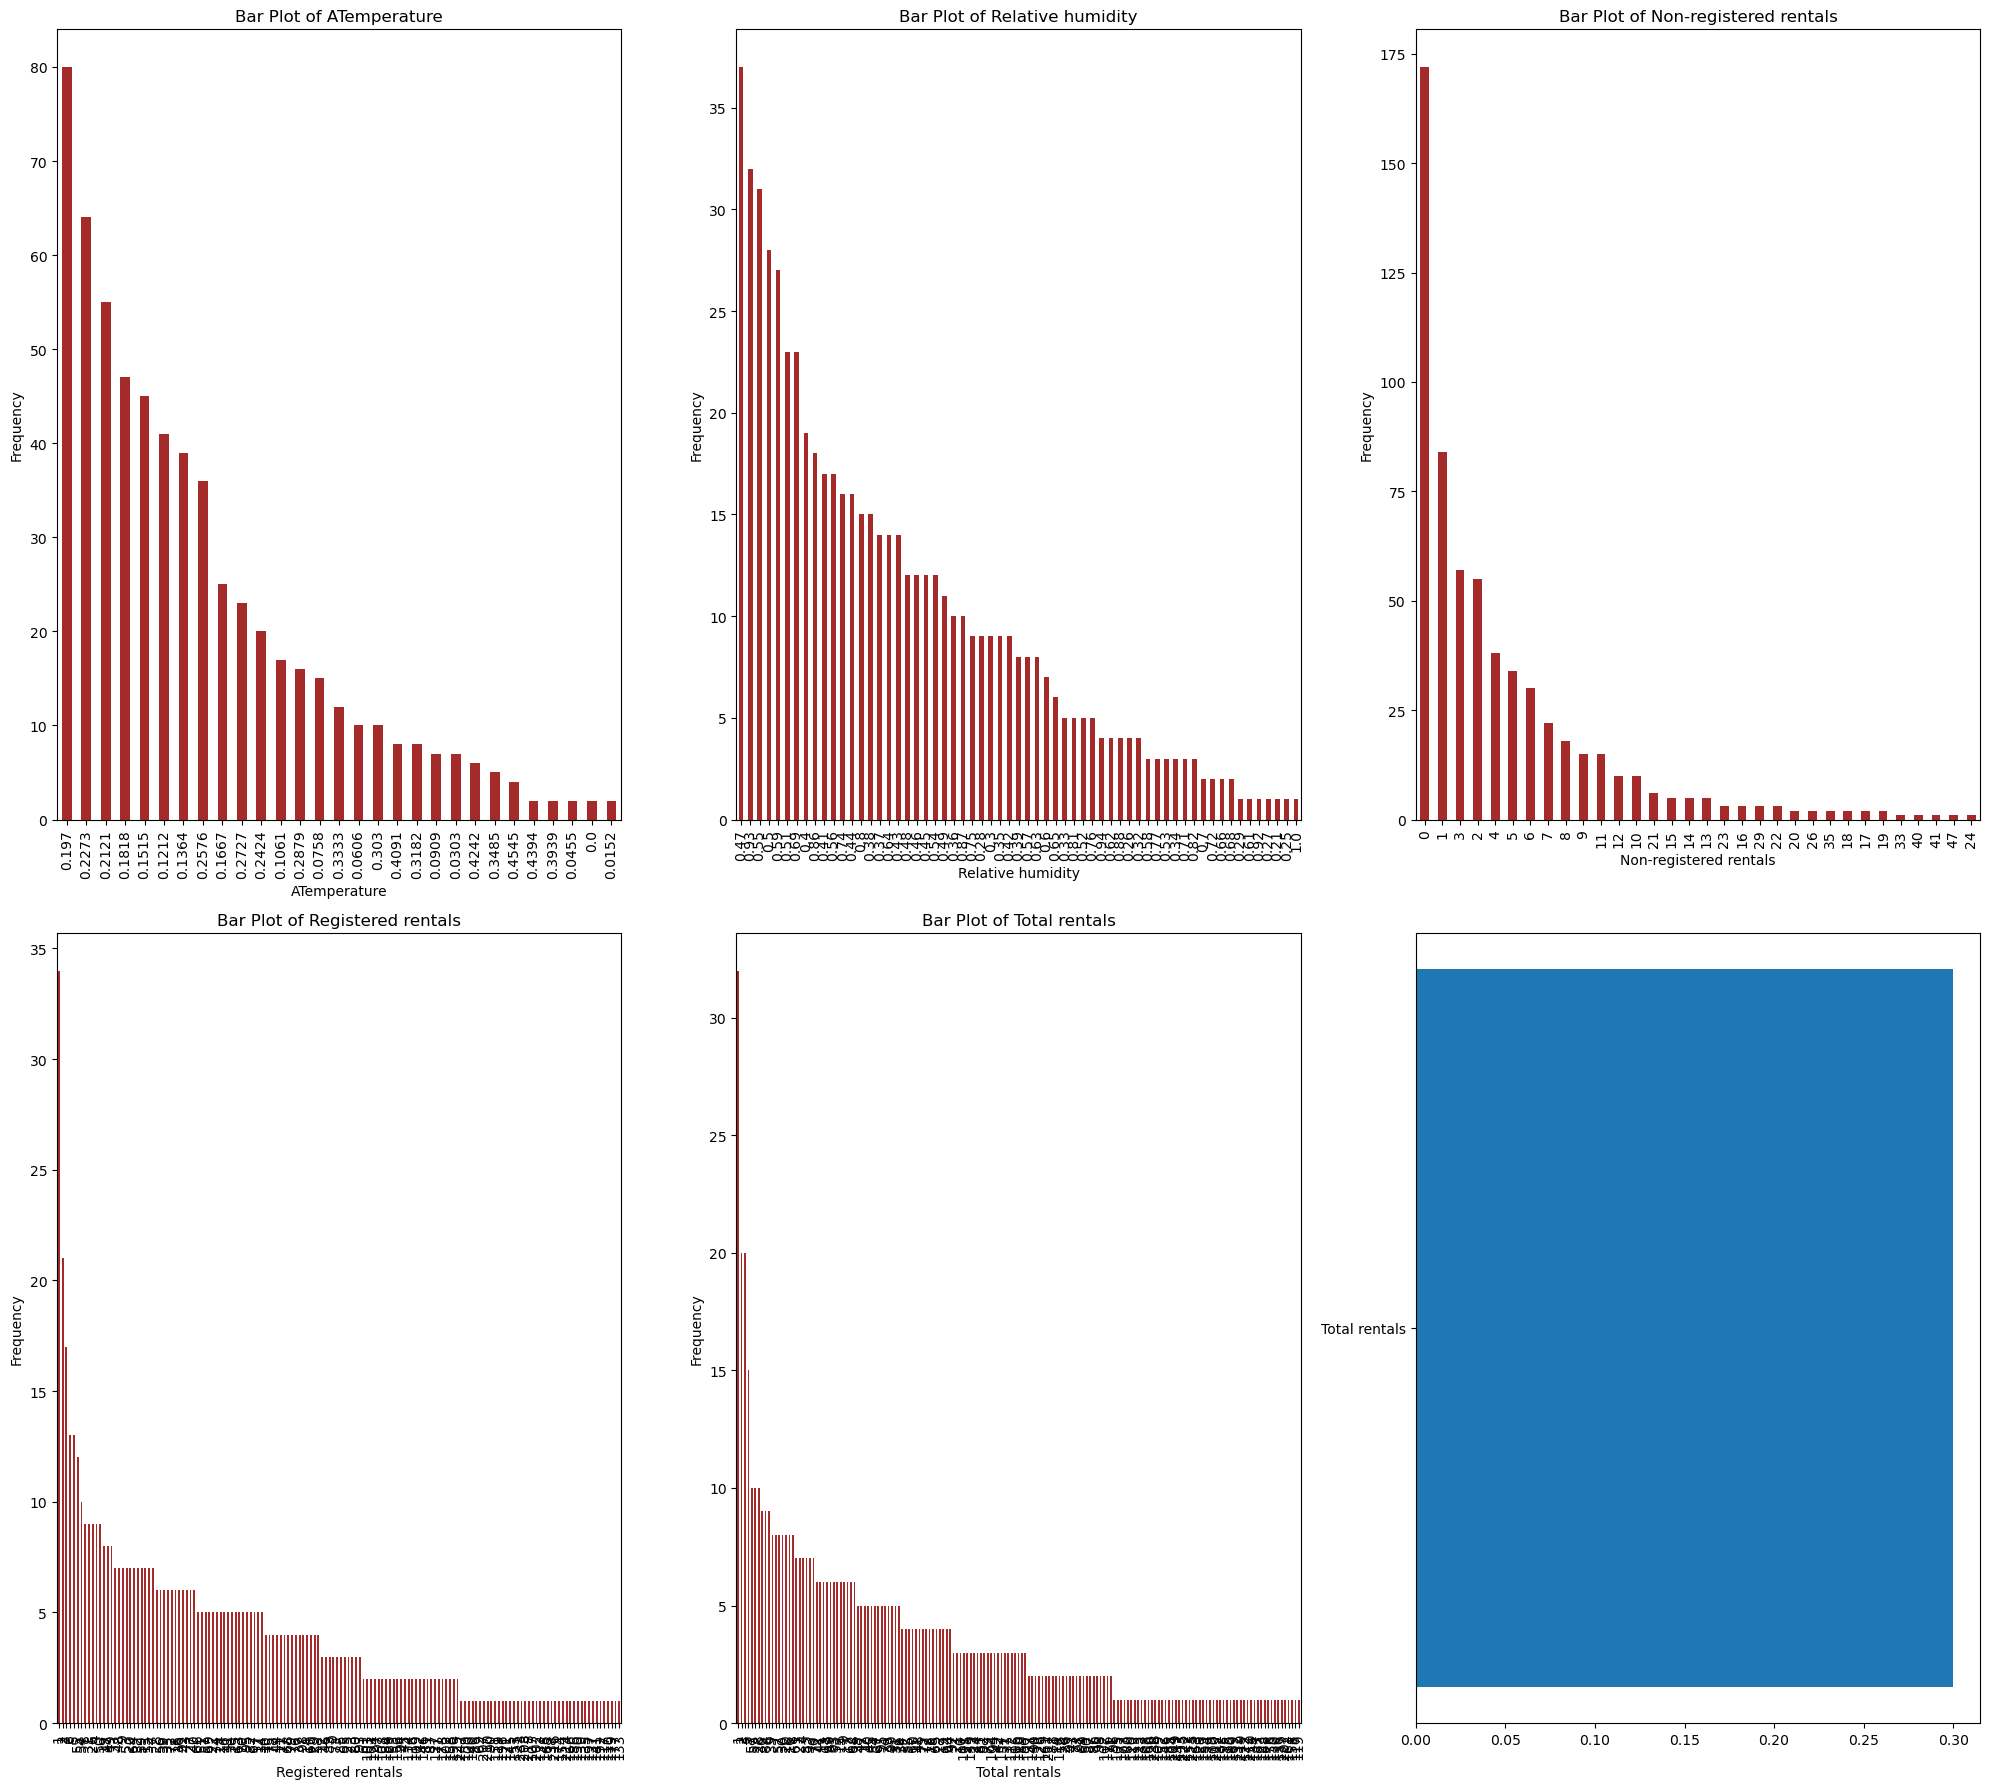

In [1515]:
# Set up the figure with a size to fit multiple plots
fig, axes = plt.subplots(2, 3, figsize=(20, 18))  # Create a 3x2 grid
axes = axes.flatten()

# List of columns to create bar plots for
columns = ['ATemperature', 'Relative humidity', 'Non-registered rentals', 'Registered rentals', 'Total rentals']

# Loop to create a bar plot for each column
for i, column in enumerate(columns):
    ax = axes[i]
    # For numerical columns, create a bar plot of the mean per category
    df2[column].value_counts().plot(kind='bar', ax=ax, color='brown')

    ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide unused axes
for j in range(len(columns), len(axes)):
    plt.barh(column,width=0.3)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [1516]:
print("Checking Null values:")
print(df2.isnull().sum())

Checking Null values:
Ride_id                   0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64


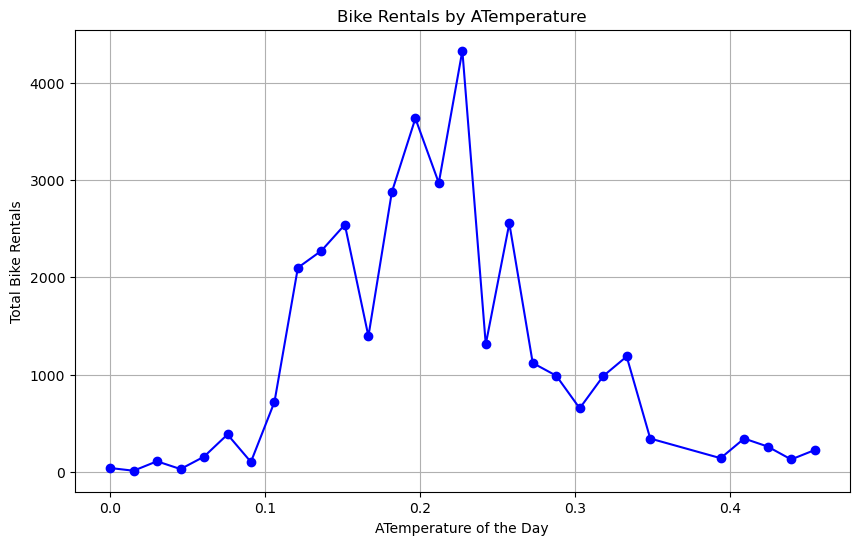

In [1517]:
# Plot 1: Bike Rentals Over Time (by Hour)
plt.figure(figsize=(10, 6))
df2.groupby('ATemperature')['Total rentals'].sum().plot(kind='line', color='blue', marker='o')
plt.title('Bike Rentals by ATemperature')
plt.xlabel('ATemperature of the Day')
plt.ylabel('Total Bike Rentals')
plt.grid(True)
plt.show()  

### After preprocessing data2 importing data into CSV file:

In [1519]:
from IPython.display import FileLink
df2.to_csv('preprocessed_data.csv', index=False)
FileLink('preprocessed_data.csv')

C:\Users\Admin\NEXTHIKES PROJECT\preprocessed_data.csv

## Mergering dataset1 and dataset2:

In [1521]:
df1 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data1.csv")
df2 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data2.csv")
# Concatenate the two DataFrames along the columns
merged_df1 = pd.merge(df1,df2,on='Ride_id',how ='inner')
# Display the merged DataFrame
print(merged_df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring  2011  January     0     True  Saturday   
1          2  01-01-2011      Spring  2011  January     1     True  Saturday   
2          3  01-01-2011      Spring  2011  January     2     True  Saturday   
3          4  01-01-2011      Spring  2011  January     3     True  Saturday   
4          5  01-01-2011      Spring  2011  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring  2011  January    11    False    Friday   
606      607  28-01-2011      Spring  2011  January    12    False    Friday   
607      608  28-01-2011      Spring  2011  January    13    False    Friday   
608      609  28-01-2011      Spring  2011  January    14    False    Friday   
609      610  28-01-2011      Spring  2011  January    15    False    Friday   

                     Weather  Temperatu

In [1522]:
print(f"Merged DataFrame shape: {merged_df1.shape}")

Merged DataFrame shape: (610, 16)


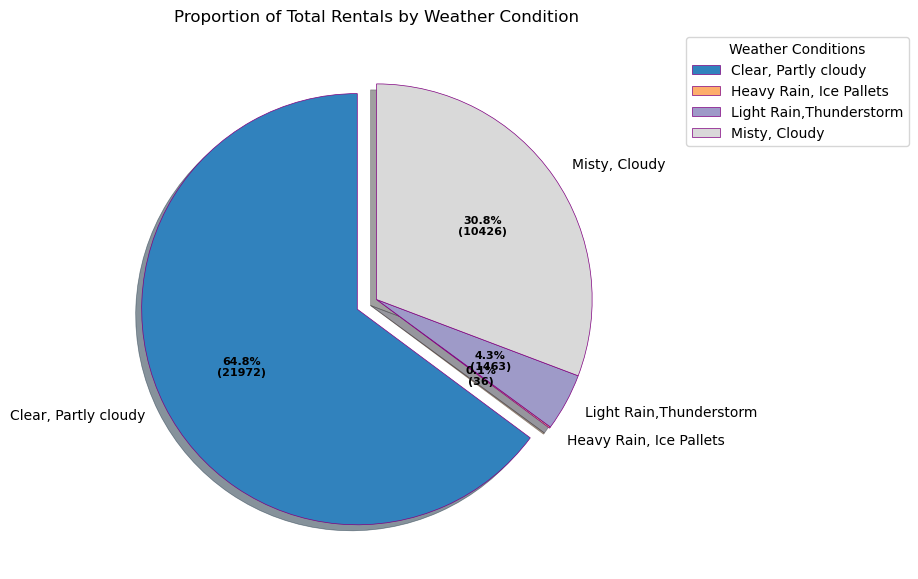

In [1523]:
data = {
    "Weather": [
        "Clear, Partly cloudy", "Clear, Partly cloudy", "Light Rain,Thunderstorm",
        "Misty, Cloudy", "Clear, Partly cloudy"
    ],
    "Total rentals": [150, 200, 100, 50, 300]
}

df = pd.DataFrame(merged_df1)

# Grouping by Weather and summing up Total rentals
grouped_data = merged_df1.groupby("Weather")["Total rentals"].sum()

# Extracting data for the pie chart
labels = grouped_data.index
sizes = grouped_data.values

# Creating explode data
explode = [0.1 if i == max(sizes) else 0.0 for i in sizes]

# Creating color parameters
colors = plt.cm.tab20c(np.linspace(0, 1, len(labels)))

# Wedge properties
wp = {'linewidth': 0.5, 'edgecolor': "purple"}

# Defining autopct function
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct=lambda pct: func(pct, sizes),
    explode=explode,
    labels=labels,
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    textprops=dict(color="black")
)

# Adding legend
ax.legend(
    wedges, labels,
    title="Weather Conditions",
    loc="upper right",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Proportion of Total Rentals by Weather Condition")

# Show plot
plt.show()


In [1524]:
print(f"Duplicate rows: {merged_df1.duplicated().sum()}")
print(f"Missing values: {merged_df1.isnull().sum().sum()}")
print(f"Unique 'Ride_id' values: {merged_df1['Ride_id'].nunique()}")

Duplicate rows: 0
Missing values: 0
Unique 'Ride_id' values: 610


In [1525]:
print("Columns in merged data1:")
print(merged_df1.columns)

Columns in merged data1:
Index(['Ride_id', 'Date', 'Season_type', 'Year', 'Month', 'Hour', 'Holiday',
       'Weekday', 'Weather', 'Temperature', 'ATemperature',
       'Relative humidity', 'Windspeed', 'Non-registered rentals',
       'Registered rentals', 'Total rentals'],
      dtype='object')


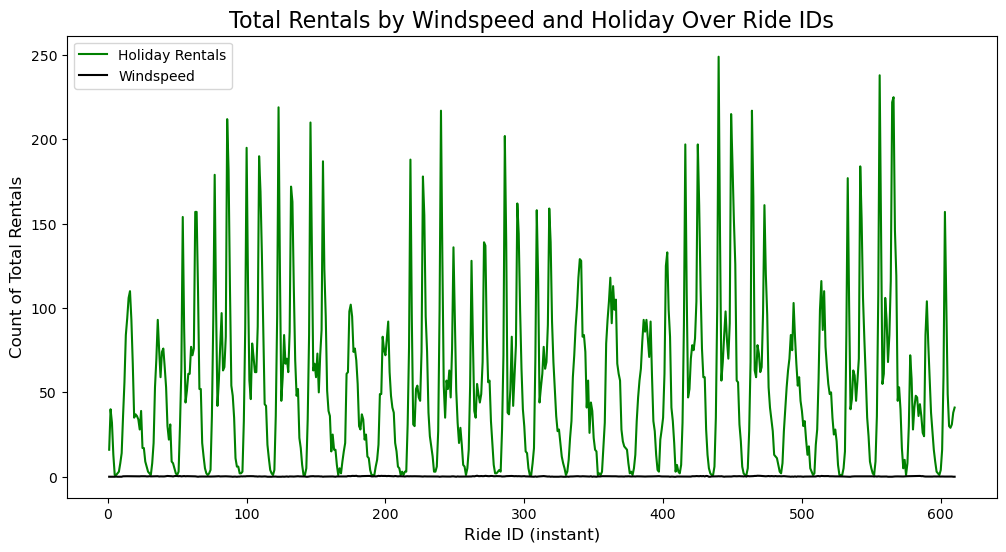

In [1526]:
plt.figure(figsize=(12, 6))

# Line plot for Holiday vs Total rentals
sns.lineplot(data=merged_df1, y='Total rentals', x='Ride_id', color='green', label='Holiday Rentals')

# Line plot for Season_type vs Total rentals
sns.lineplot(data=merged_df1, y='Windspeed', x='Ride_id', color='black', label='Windspeed')

# Adding titles and labels
plt.title("Total Rentals by Windspeed and Holiday Over Ride IDs", fontsize=16)
plt.xlabel("Ride ID (instant)", fontsize=12)
plt.ylabel("Count of Total Rentals", fontsize=12)

# Show legend
plt.legend()

# Show the plot
plt.show()



In [1527]:
print(merged_df1.isnull().sum())

Ride_id                   0
Date                      0
Season_type               0
Year                      0
Month                     0
Hour                      0
Holiday                   0
Weekday                   0
Weather                   0
Temperature               0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64


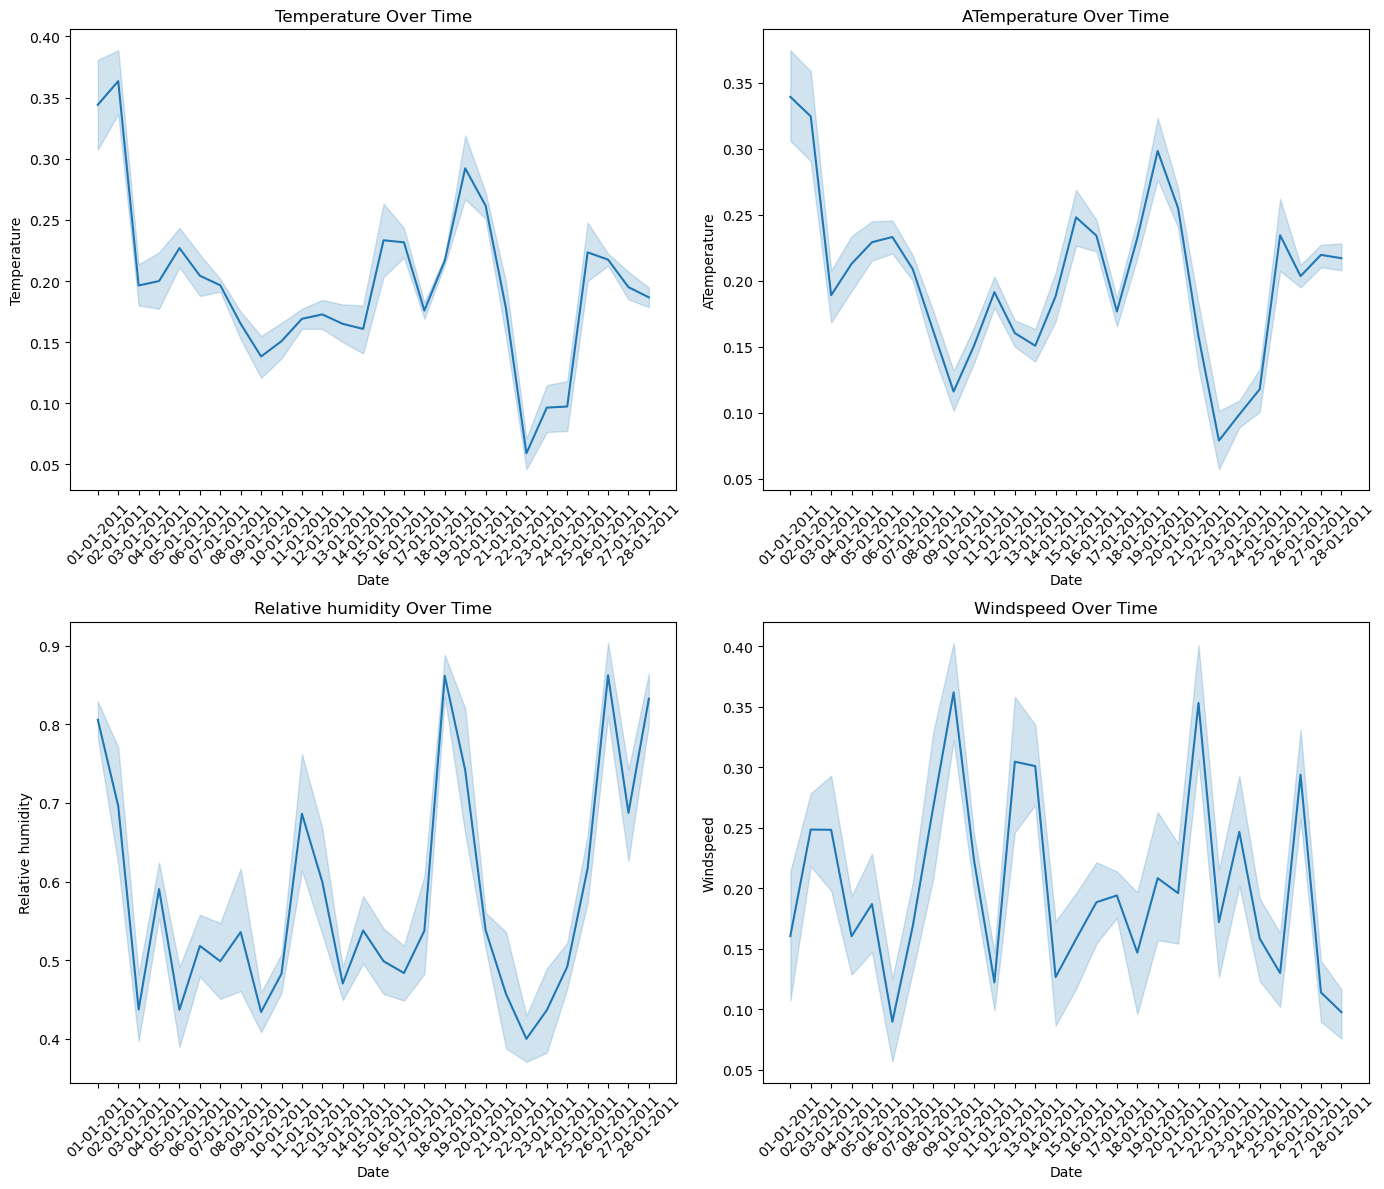

In [1528]:
# List of numerical columns you want to plot
numerical_columns = ['Temperature', 'ATemperature', 'Relative humidity', 'Windspeed']

# Create subplots for each numerical column
plt.figure(figsize=(14, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.lineplot(x=merged_df1['Date'], y=merged_df1[column])
    plt.title(f'{column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


### After preprocessing data1+data2 importing merge data into CSV file:

In [1530]:
merged_df1
from IPython.display import FileLink
merged_df1.to_csv('merged_df1.csv', index=False)
FileLink('merged_df1.csv')

C:\Users\Admin\NEXTHIKES PROJECT\merged_df1.csv

In [1531]:
df3 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset3.csv")

In [1543]:
df3.rename(columns={
    'instant': 'Ride_id',
    'dteday': 'Date',
    'yr' : 'Year',
    'mnth' :'Month',
    'hr' :'Hour',
    'holiday':'Holiday',
    'windspeed':'Windspeed',
    'season': 'Season_type',
    'weathersit': 'Weather',
     'weekday': 'Weekday',
    'temp': 'Temperature',
    'atemp': 'ATemperature',
    'instant': 'Ride_id',
    'hum': 'Relative humidity',
    'casual' :'Non-registered rentals',
    'registered': 'Registered rentals',
    'cnt': 'Total rentals',
}, inplace=True)
df3['Weather'] = df3['Weather'].replace({1:'Clear, Partly cloudy', 2:'Misty, Cloudy',3:'Light Rain,Thunderstorm',
                                       4: 'Heavy Rain, Ice Pallets'})
df3['Weekday'] = df3['Weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
print(df3)

     Ride_id        Date  Season_type  Year  Month  Hour  Holiday   Weekday  \
0        620  29-01-2011            1     0      1     1    False  Saturday   
1        621  29-01-2011            1     0      1     2    False  Saturday   
2        622  29-01-2011            1     0      1     3    False  Saturday   
3        623  29-01-2011            1     0      1     4    False  Saturday   
4        624  29-01-2011            1     0      1     6    False  Saturday   
..       ...         ...          ...   ...    ...   ...      ...       ...   
385      615  28-01-2011            1     0      1    20    False    Friday   
386      616  28-01-2011            1     0      1    21    False    Friday   
387      617  28-01-2011            1     0      1    22    False    Friday   
388      618  28-01-2011            1     0      1    23    False    Friday   
389      619  29-01-2011            1     0      1     0    False  Saturday   

                  Weather  Temperature  ATemperatur

In [1544]:
df3['Month'] = df3['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
                 10: 'October', 11: 'November', 12: 'December'})
df3['Season_type'] = df3['Season_type'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
print(df3)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        620  29-01-2011      Spring     0  January     1    False  Saturday   
1        621  29-01-2011      Spring     0  January     2    False  Saturday   
2        622  29-01-2011      Spring     0  January     3    False  Saturday   
3        623  29-01-2011      Spring     0  January     4    False  Saturday   
4        624  29-01-2011      Spring     0  January     6    False  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
385      615  28-01-2011      Spring     0  January    20    False    Friday   
386      616  28-01-2011      Spring     0  January    21    False    Friday   
387      617  28-01-2011      Spring     0  January    22    False    Friday   
388      618  28-01-2011      Spring     0  January    23    False    Friday   
389      619  29-01-2011      Spring     0  January     0    False  Saturday   

                  Weather  Temperature 

In [1545]:
Year_mapping = {0: 2011,1: 2012}
df3['Year'] = df3['Year'].map(Year_mapping)
print(df3)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        620  29-01-2011      Spring  2011  January     1    False  Saturday   
1        621  29-01-2011      Spring  2011  January     2    False  Saturday   
2        622  29-01-2011      Spring  2011  January     3    False  Saturday   
3        623  29-01-2011      Spring  2011  January     4    False  Saturday   
4        624  29-01-2011      Spring  2011  January     6    False  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
385      615  28-01-2011      Spring  2011  January    20    False    Friday   
386      616  28-01-2011      Spring  2011  January    21    False    Friday   
387      617  28-01-2011      Spring  2011  January    22    False    Friday   
388      618  28-01-2011      Spring  2011  January    23    False    Friday   
389      619  29-01-2011      Spring  2011  January     0    False  Saturday   

                  Weather  Temperature 

In [1546]:
print("Data sheet-3 sorted in sequential order:")
# Sorting the DataFrame to ensure 'Ride_id' is in sequential order
df3_sorted_sequential = df3.sort_values(by='Ride_id').reset_index(drop=True)

# Checking for sequential order
is_sequential = df3_sorted_sequential['Ride_id'].is_monotonic_increasing

df3_sorted_sequential.head(),df3_sorted_sequential.tail(),is_sequential

Data sheet-3 sorted in sequential order:


(   Ride_id        Date Season_type  Year    Month  Hour  Holiday Weekday  \
 0      611  28-01-2011      Spring  2011  January    16    False  Friday   
 1      612  28-01-2011      Spring  2011  January    17    False  Friday   
 2      613  28-01-2011      Spring  2011  January    18    False  Friday   
 3      614  28-01-2011      Spring  2011  January    19    False  Friday   
 4      615  28-01-2011      Spring  2011  January    20    False  Friday   
 
                 Weather  Temperature  ATemperature  Relative humidity  \
 0  Clear, Partly cloudy         0.22        0.2727               0.80   
 1  Clear, Partly cloudy         0.24        0.2424               0.75   
 2  Clear, Partly cloudy         0.24        0.2273               0.75   
 3         Misty, Cloudy         0.24        0.2424               0.75   
 4         Misty, Cloudy         0.24        0.2273               0.70   
 
    Windspeed  Non-registered rentals  Registered rentals  Total rentals  
 0     0.0000  

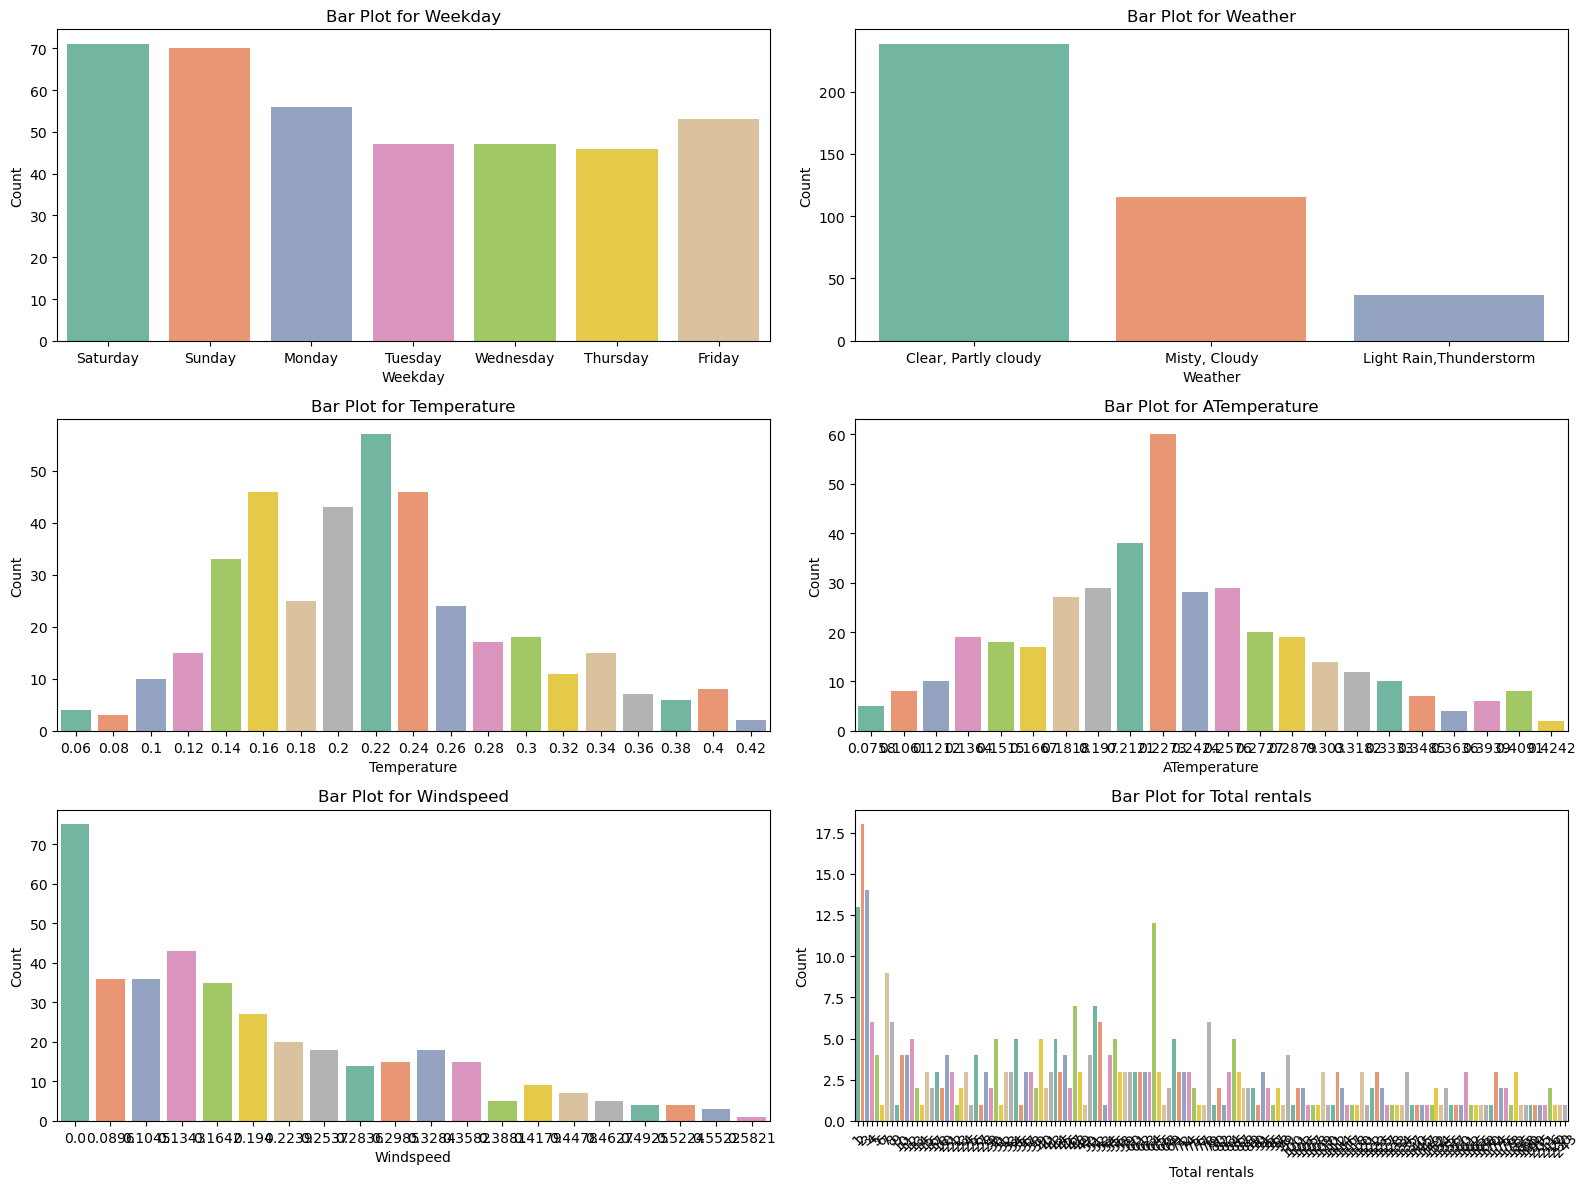

In [1547]:
# Columns to plot
columns = ['Weekday', 'Weather', 'Temperature', 'ATemperature', 'Windspeed', 'Total rentals']

# Create a figure with multiple subplots (5 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create a bar plot for each
for i, column in enumerate(columns):
    # Using seaborn's countplot to show the counts of each unique value in the column
    sns.countplot(x=df3[column], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Bar Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout for better spacing

plt.tight_layout()
plt.show()


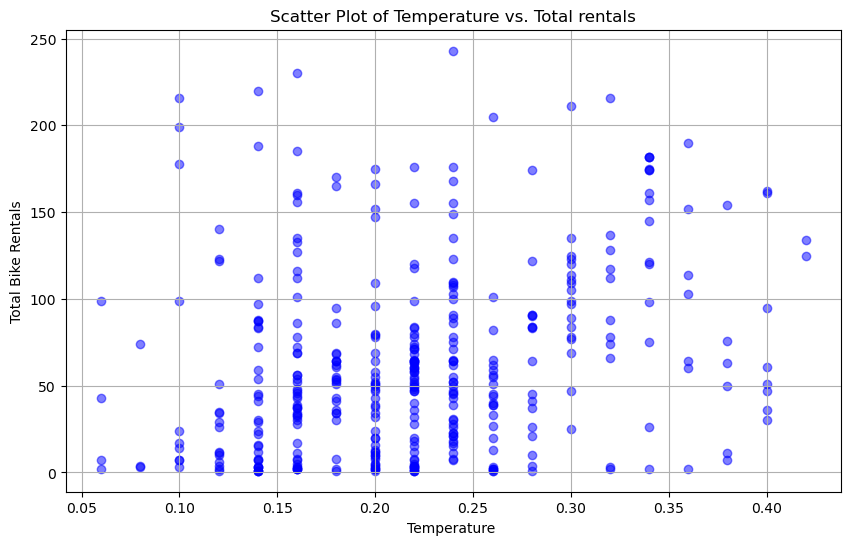

In [1548]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['Temperature'], df3['Total rentals'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Temperature vs. Total rentals')
plt.xlabel('Temperature ')
plt.ylabel('Total Bike Rentals')
plt.grid(True)
plt.show()


### After preprocessing data3 importing data into CSV file:

In [1550]:
from IPython.display import FileLink
df3.to_csv('df3.csv', index=False)
FileLink('df3.csv')

C:\Users\Admin\NEXTHIKES PROJECT\df3.csv

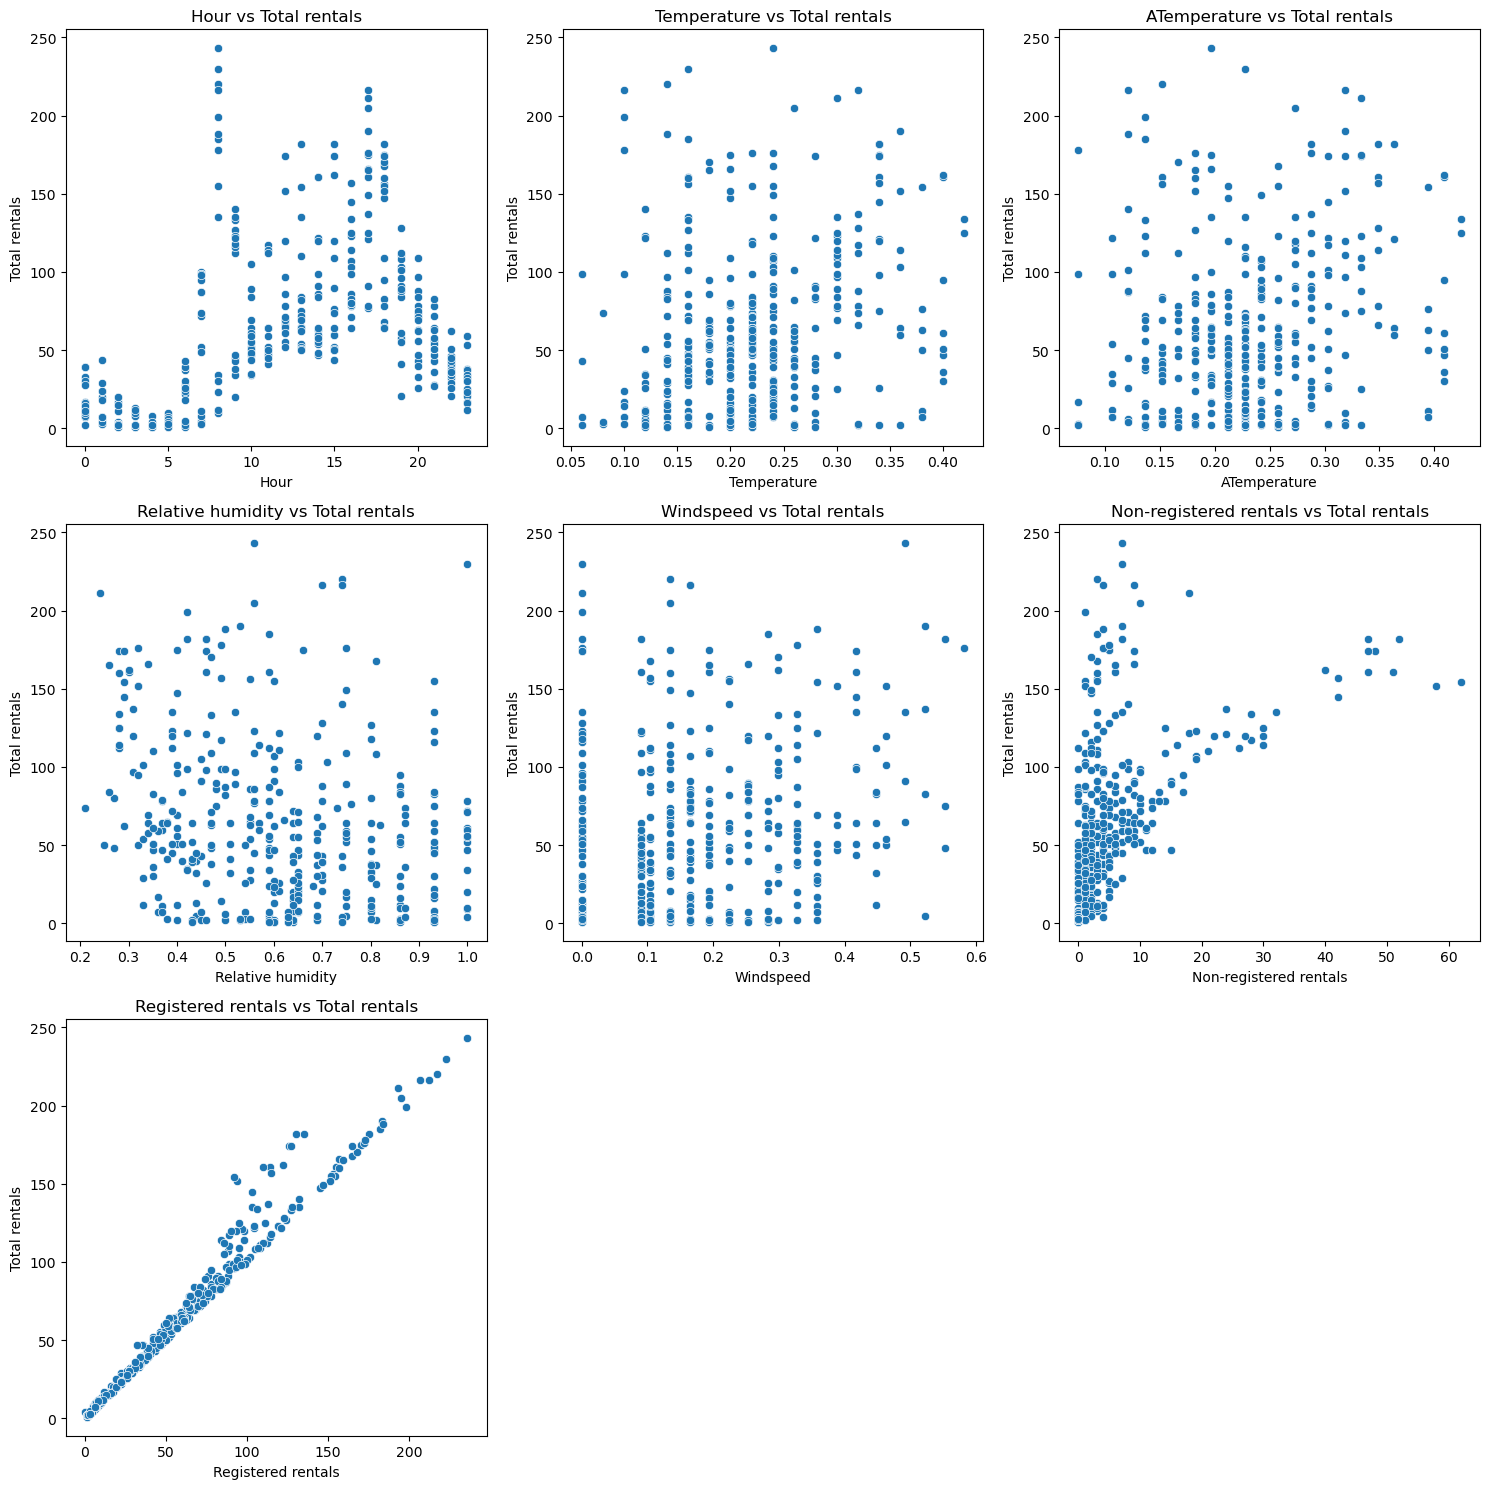

In [1551]:
# List of columns to plot against 'Total rentals'
cols_to_plot = ['Hour', 'Temperature', 'ATemperature', 'Relative humidity', 
                'Windspeed', 'Non-registered rentals', 'Registered rentals']

# Calculate the number of rows and columns for the grid
ncols = 3  # Number of columns in the grid
nrows = int(np.ceil(len(cols_to_plot) / ncols))  # Calculate the number of rows needed

# Create a figure and axes for the grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of axes to make it easier to loop over
axes = axes.flatten()

# Loop over the columns and the axes to create scatter plots
for i, col in enumerate(cols_to_plot):
    sns.scatterplot(data=df3, x=col, y='Total rentals', ax=axes[i])
    axes[i].set_title(f'{col} vs Total rentals')  # Set title for each subplot

# Remove any empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Merging merge_df1 & preprocessed data3 in python file using pandas:

In [1553]:
merge_df1 = pd.read_csv(r"d:\Users\Admin\Downloads\merged_df1.csv")
PreP_df3 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data3.csv")
merged_df2 =pd.concat([merge_df1,PreP_df3], ignore_index=True)

In [1554]:
print(merged_df2.shape),merged_df2.head(5),merged_df2.tail(5)

(1000, 16)


(None,
    Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
 0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
 1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
 2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
 3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
 4        5  01-01-2011      Spring  2011  January     4     True  Saturday   
 
                 Weather  Temperature  ATemperature  Relative humidity  \
 0  Clear, Partly cloudy         0.24        0.2879               0.81   
 1  Clear, Partly cloudy         0.22        0.2727               0.80   
 2  Clear, Partly cloudy         0.22        0.2727               0.80   
 3  Clear, Partly cloudy         0.24        0.2879               0.75   
 4  Clear, Partly cloudy         0.24        0.2879               0.75   
 
    Windspeed  Non-registered rentals  Registered rentals  Total rental

In [1555]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_id                 1000 non-null   int64  
 1   Date                    1000 non-null   object 
 2   Season_type             1000 non-null   object 
 3   Year                    1000 non-null   int64  
 4   Month                   1000 non-null   object 
 5   Hour                    1000 non-null   int64  
 6   Holiday                 1000 non-null   bool   
 7   Weekday                 1000 non-null   object 
 8   Weather                 1000 non-null   object 
 9   Temperature             1000 non-null   float64
 10  ATemperature            1000 non-null   float64
 11  Relative humidity       1000 non-null   float64
 12  Windspeed               1000 non-null   float64
 13  Non-registered rentals  1000 non-null   int64  
 14  Registered rentals      1000 non-null   i

In [1556]:
print(merged_df2.isnull().sum())
print(merged_df2.shape)

Ride_id                   0
Date                      0
Season_type               0
Year                      0
Month                     0
Hour                      0
Holiday                   0
Weekday                   0
Weather                   0
Temperature               0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64
(1000, 16)


In [1560]:
from IPython.display import FileLink
merged_df2.to_csv('merged_df2.csv', index=False)
FileLink('merged_df2.csv')

C:\Users\Admin\NEXTHIKES PROJECT\merged_df2.csv

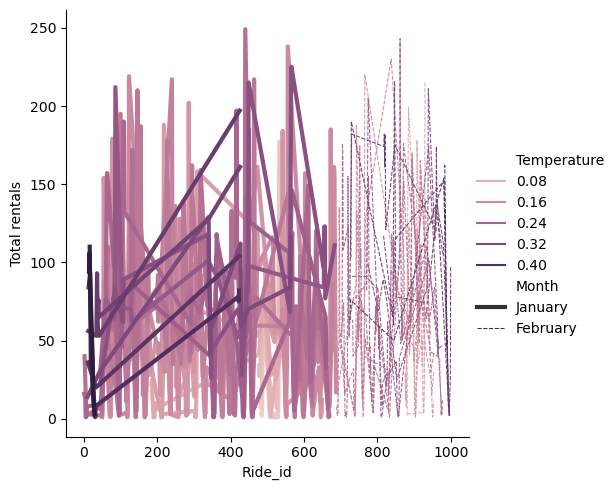

In [1561]:
sns.relplot(kind = 'line', data = merged_df2, x ='Ride_id', y = 'Total rentals',hue = 'Temperature',size='Month', style='Month' )

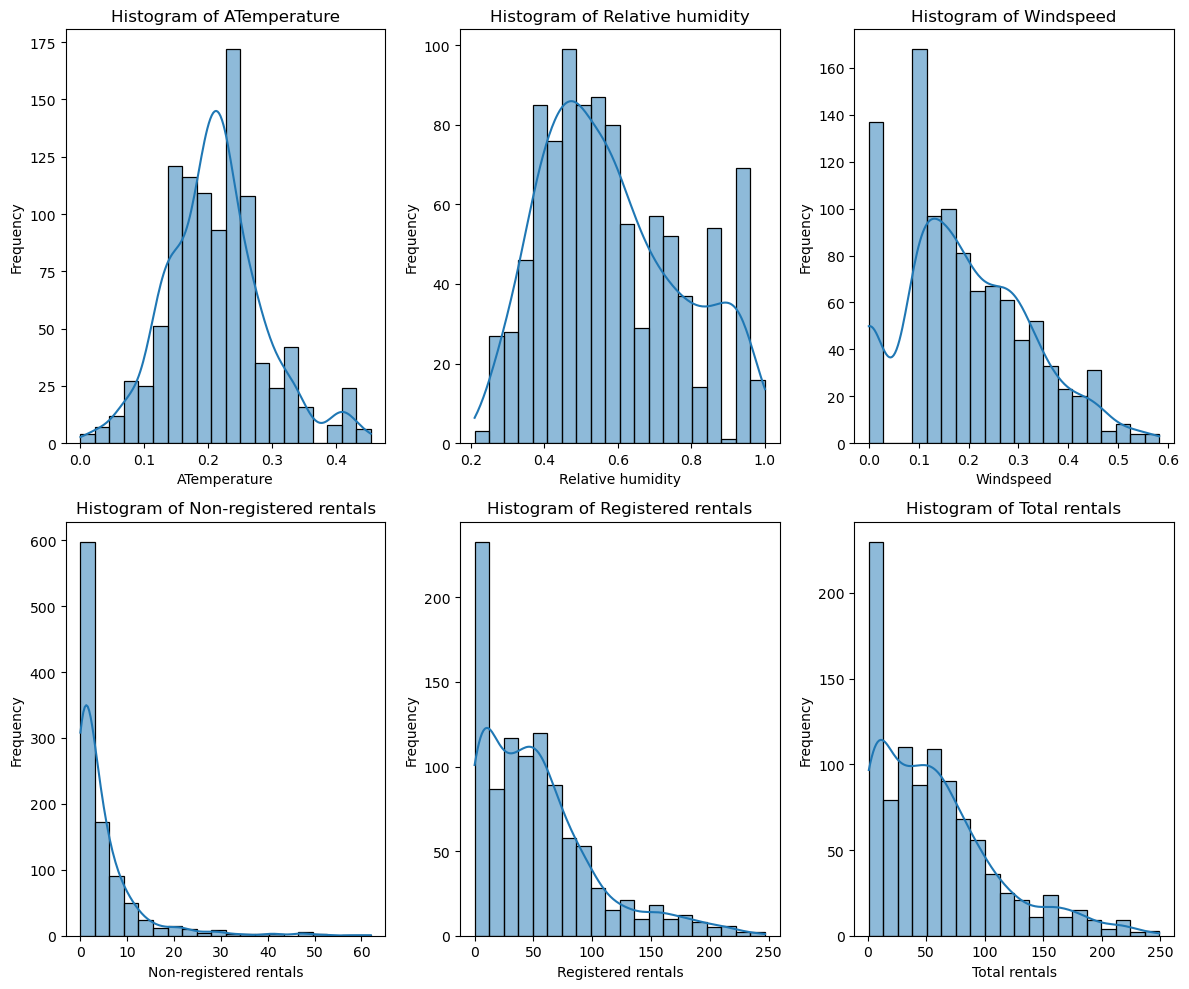

In [1562]:
# List of columns to plot histograms for
columns = ['ATemperature', 'Relative humidity','Windspeed','Non-registered rentals'
,'Registered rentals','Total rentals']

# Create histograms for each column
plt.figure(figsize=(12, 10))

# Loop through the columns and create subplots
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.histplot(merged_df2[column], kde=True, bins=20)  # `kde=True` adds a Kernel Density Estimate curve
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


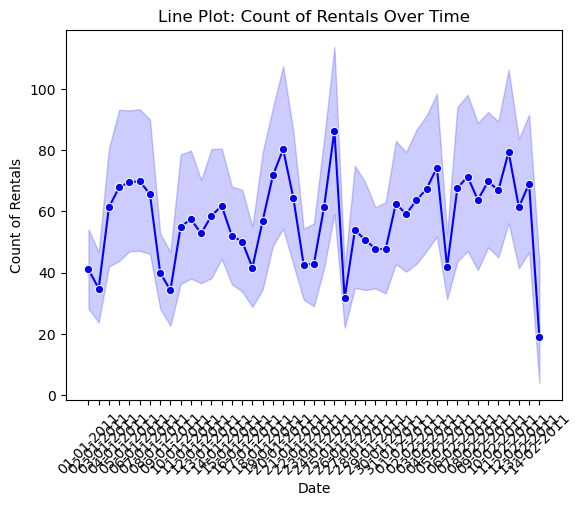

In [1563]:
sns.lineplot(x='Date', y='Total rentals', data=merged_df2, marker='o', color='b')

# Set the plot title and labels
plt.title('Line Plot: Count of Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Rentals')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [1568]:
print("Columns in merged data-2:")
print(merged_df2.columns)

Columns in merged data-2:
Index(['Ride_id', 'Date', 'Season_type', 'Year', 'Month', 'Hour', 'Holiday',
       'Weekday', 'Weather', 'Temperature', 'ATemperature',
       'Relative humidity', 'Windspeed', 'Non-registered rentals',
       'Registered rentals', 'Total rentals'],
      dtype='object')


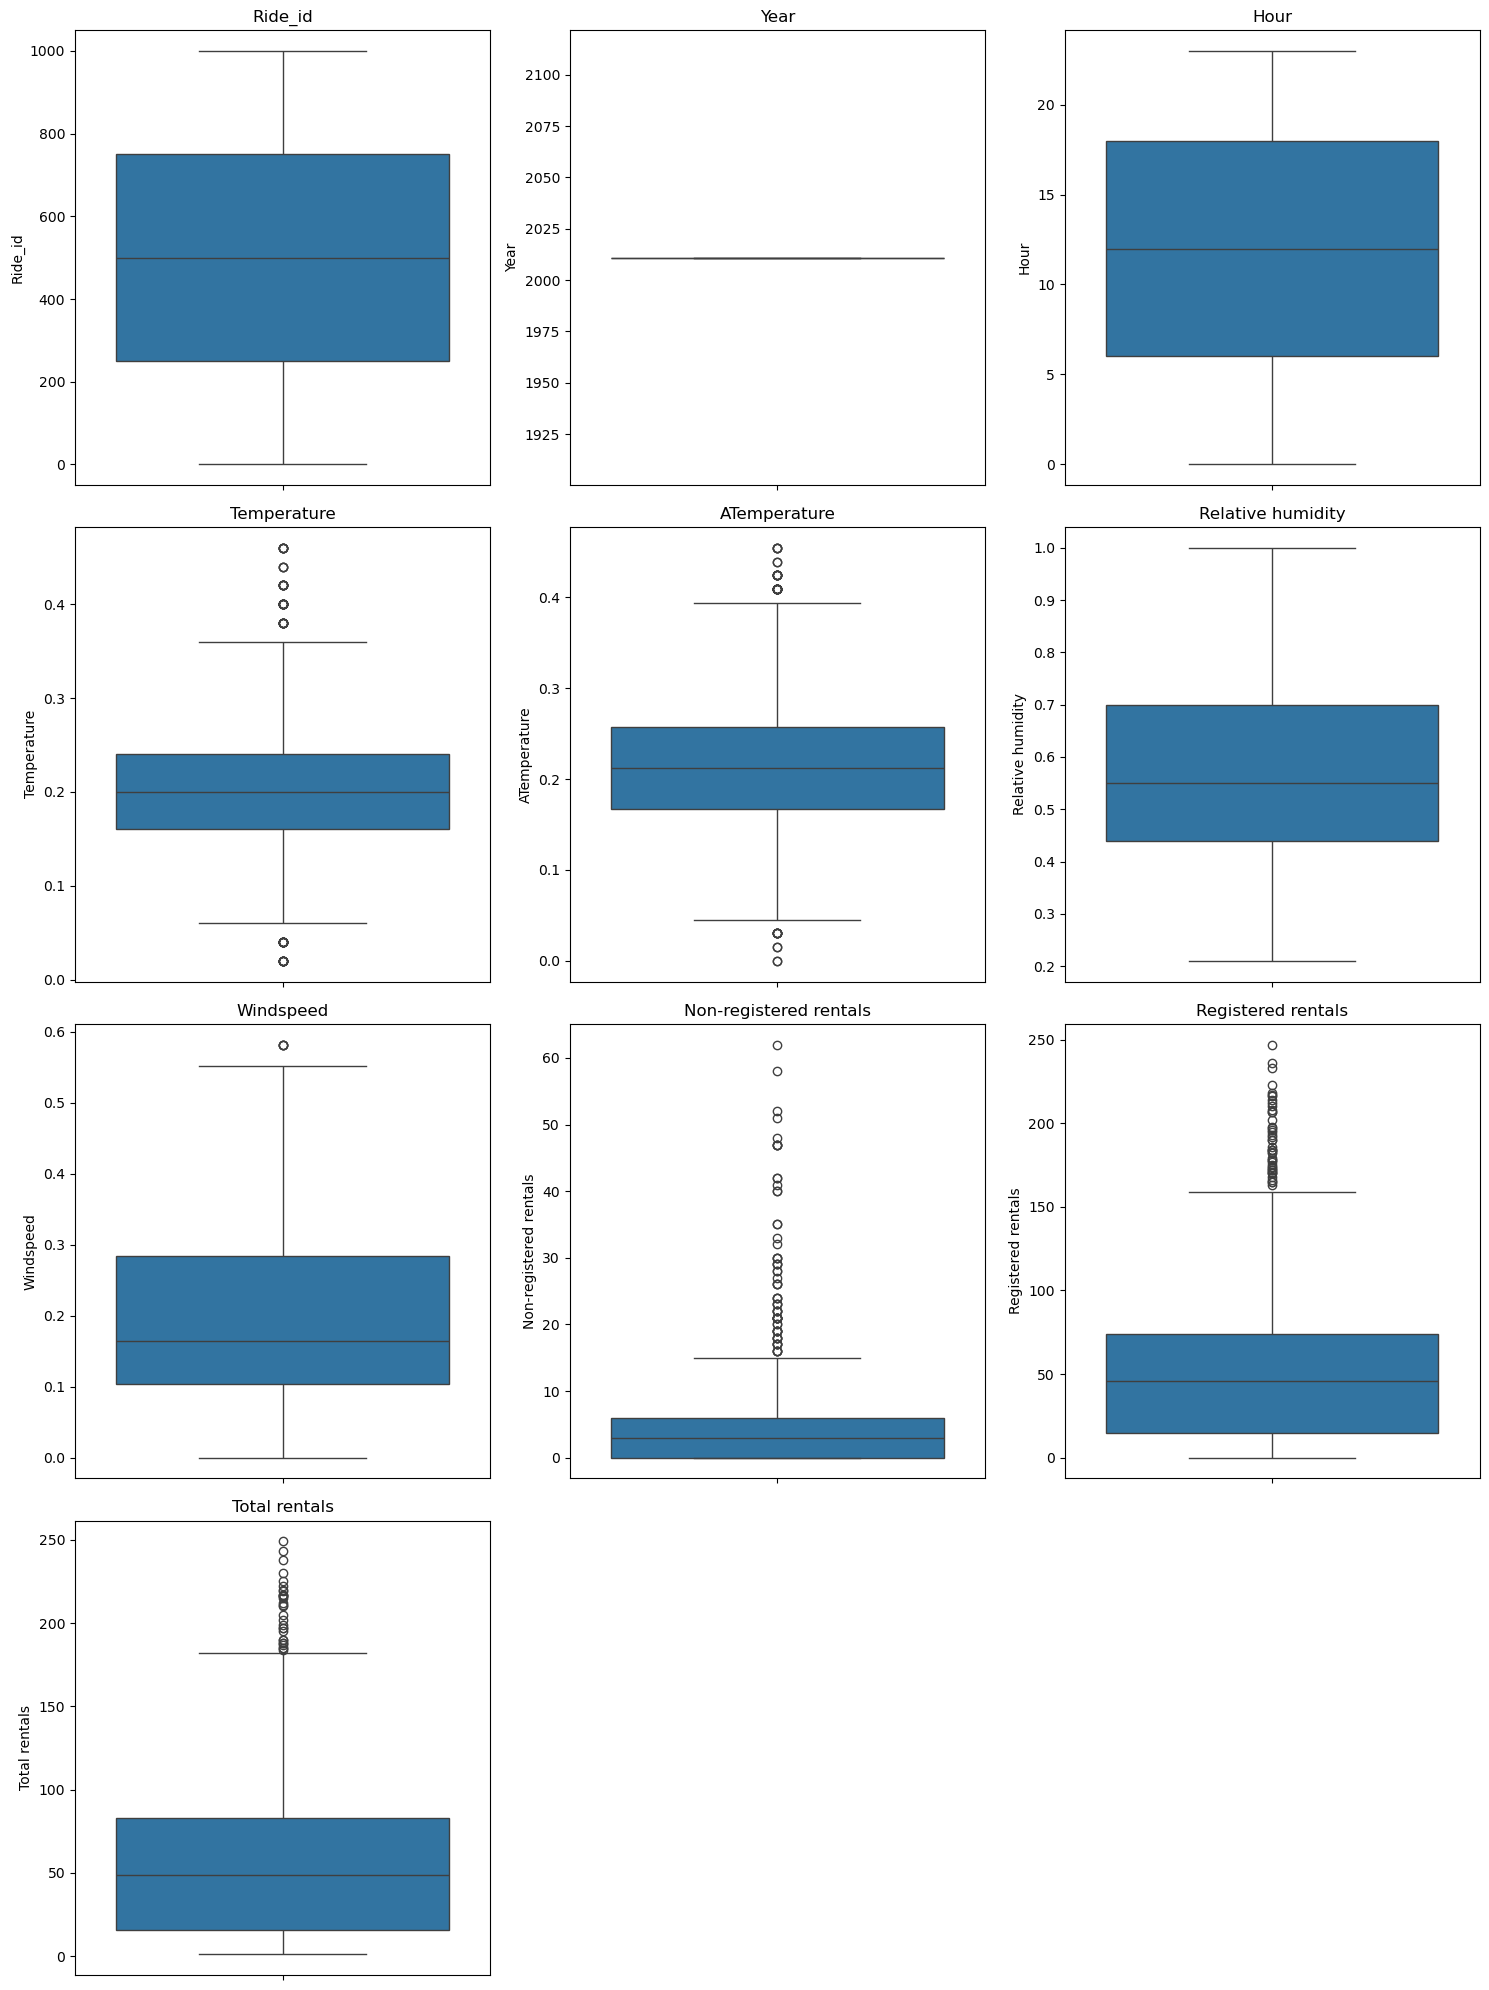

In [1569]:
numerical_cols = merged_df2.select_dtypes(include=['int64','float64']).columns
num_cols = len(numerical_cols)

# Calculate the number of rows and columns for the subplots
ncols = 3
nrows = int(np.ceil(num_cols / ncols))  # Ceiling division to handle any extra columns

plt.figure(figsize=(15, 5 * nrows))  # Adjust figure height based on number of rows

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=merged_df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [1570]:
merged_df2['Temperature'].value_counts()

Temperature
0.22    136
0.20    132
0.16    130
0.14     89
0.24     86
0.18     79
0.26     56
0.12     44
0.30     37
0.10     32
0.28     27
0.32     24
0.34     20
0.40     16
0.36     15
0.06     15
0.04     14
0.08     12
0.02     10
0.38      9
0.42      8
0.46      6
0.44      3
Name: count, dtype: int64

### IQR (Interquartile Range) measures statistical dispersion, which is the spread of data values. 
### It describes the range within which the middle 50% of the data lies and central portion of the dataset.
## IQR=Q3(Third Quartile)−Q1(First Quartile)


In [1572]:
q1=merged_df2["Temperature"].quantile(0.25)
q2=merged_df2["Temperature"].quantile(0.50)
q3=merged_df2["Temperature"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 0.16
The second quantile is 0.2
The third quantile is 0.24


In [1573]:
IQR=(q3-q1)
print('The inner quantile is',IQR)
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print('The lower limit is',lower_limit)
print('The upper limit is',upper_limit)

The inner quantile is 0.07999999999999999
The lower limit is 0.04000000000000002
The upper limit is 0.36


In [1574]:
merged_df2[(merged_df2["Temperature"]<lower_limit)|(merged_df2["Temperature"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
10,11,01-01-2011,Spring,2011,January,10,True,Saturday,"Clear, Partly cloudy",0.38,0.3939,0.76,0.2537,12,24,36
12,13,01-01-2011,Spring,2011,January,12,True,Saturday,"Clear, Partly cloudy",0.42,0.4242,0.77,0.2836,29,55,84
13,14,01-01-2011,Spring,2011,January,13,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2985,47,47,94
14,15,01-01-2011,Spring,2011,January,14,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2836,35,71,106
15,16,01-01-2011,Spring,2011,January,15,True,Saturday,"Misty, Cloudy",0.44,0.4394,0.77,0.2985,40,70,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,13-02-2011,Spring,2011,February,21,False,Sunday,"Clear, Partly cloudy",0.40,0.4091,0.35,0.3582,6,45,51
990,991,13-02-2011,Spring,2011,February,22,False,Sunday,"Clear, Partly cloudy",0.40,0.4091,0.35,0.2985,5,31,36
991,992,13-02-2011,Spring,2011,February,23,False,Sunday,"Clear, Partly cloudy",0.40,0.4091,0.35,0.3582,3,27,30
992,993,14-02-2011,Spring,2011,February,0,False,Monday,"Clear, Partly cloudy",0.38,0.3939,0.37,0.3582,3,8,11


In [1575]:
q1=merged_df2["ATemperature"].quantile(0.25)
q2=merged_df2["ATemperature"].quantile(0.50)
q3=merged_df2["ATemperature"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 0.1667
The second quantile is 0.2121
The third quantile is 0.2576


In [1576]:
IQR=(q3-q1)
print('The inner quantile is',IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print('The lower limit is',lower_limit)
print('The upper limit is',upper_limit)

The inner quantile is 0.09090000000000001
The lower limit is 0.03034999999999996
The upper limit is 0.39395


In [1577]:
merged_df2[(merged_df2["ATemperature"]<lower_limit)|(merged_df2["ATemperature"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
12,13,01-01-2011,Spring,2011,January,12,True,Saturday,"Clear, Partly cloudy",0.42,0.4242,0.77,0.2836,29,55,84
13,14,01-01-2011,Spring,2011,January,13,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2985,47,47,94
14,15,01-01-2011,Spring,2011,January,14,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2836,35,71,106
15,16,01-01-2011,Spring,2011,January,15,True,Saturday,"Misty, Cloudy",0.44,0.4394,0.77,0.2985,40,70,110
16,17,01-01-2011,Spring,2011,January,16,True,Saturday,"Misty, Cloudy",0.42,0.4242,0.82,0.2985,41,52,93
18,19,01-01-2011,Spring,2011,January,18,True,Saturday,"Light Rain,Thunderstorm",0.42,0.4242,0.88,0.2537,9,26,35
19,20,01-01-2011,Spring,2011,January,19,True,Saturday,"Light Rain,Thunderstorm",0.42,0.4242,0.88,0.2537,6,31,37
20,21,01-01-2011,Spring,2011,January,20,True,Saturday,"Misty, Cloudy",0.40,0.4091,0.87,0.2537,11,25,36
21,22,01-01-2011,Spring,2011,January,21,True,Saturday,"Misty, Cloudy",0.40,0.4091,0.87,0.1940,3,31,34
22,23,01-01-2011,Spring,2011,January,22,True,Saturday,"Misty, Cloudy",0.40,0.4091,0.94,0.2239,11,17,28


#### A quantile is a statistical term used to describe the division of sorted data into q parts or probability distribution into equal parts.
#### The most commonly used quantiles have special names: Quartiles (4-quantiles): Three quartiles split the data into four parts.

In [1579]:
q1=merged_df2["Windspeed"].quantile(0.25)
q2=merged_df2["Windspeed"].quantile(0.50)
q3=merged_df2["Windspeed"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 0.1045
The second quantile is 0.1642
The third quantile is 0.2836


In [1580]:
IQR=(q3-q1)
print('The inner quantile is',IQR)

The inner quantile is 0.17910000000000004


In [1581]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print('The lower limit is',lower_limit)
print('The upper limit is',upper_limit)

The lower limit is -0.16415000000000007
The upper limit is 0.5522500000000001


In [1582]:
merged_df2[(merged_df2["Windspeed"]<lower_limit)|(merged_df2["Windspeed"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
265,266,12-01-2011,Spring,2011,January,12,False,Wednesday,"Clear, Partly cloudy",0.20,0.1515,0.47,0.5821,3,52,55
467,468,21-01-2011,Spring,2011,January,12,False,Friday,"Clear, Partly cloudy",0.22,0.1818,0.27,0.5821,11,67,78
468,469,21-01-2011,Spring,2011,January,13,False,Friday,"Clear, Partly cloudy",0.20,0.1515,0.21,0.5821,8,65,73
870,871,08-02-2011,Spring,2011,February,17,False,Tuesday,"Clear, Partly cloudy",0.22,0.1818,0.32,0.5821,4,172,176


In [1583]:
q1=merged_df2["Relative humidity"].quantile(0.25)
q2=merged_df2["Relative humidity"].quantile(0.50)
q3=merged_df2["Relative humidity"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 0.44
The second quantile is 0.55
The third quantile is 0.7


In [1584]:
IQR=(q3-q1)
print("The inner quantile is",IQR)

The inner quantile is 0.25999999999999995


In [1586]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower limit is",lower_limit)
print("The upper limit is",upper_limit)

The lower limit is 0.0500000000000001
The upper limit is 1.0899999999999999


In [1588]:
merged_df2[(merged_df2["Relative humidity"]<lower_limit)|(merged_df2["Relative humidity"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals


In [1590]:
q1=merged_df2["Non-registered rentals"].quantile(0.25)
q2=merged_df2["Non-registered rentals"].quantile(0.50)
q3=merged_df2["Non-registered rentals"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 0.0
The second quantile is 3.0
The third quantile is 6.0


In [1591]:
IQR=(q3-q1)
print("The inner quartile is",IQR)
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower limit is",lower_limit)
print("The upper limit is",upper_limit)

The inner quartile is 6.0
The lower limit is -9.0
The upper limit is 15.0


In [1592]:
merged_df2[(merged_df2["Non-registered rentals"]<lower_limit)|(merged_df2["Non-registered rentals"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
11,12,01-01-2011,Spring,2011,January,11,True,Saturday,"Clear, Partly cloudy",0.36,0.3333,0.81,0.2836,26,30,56
12,13,01-01-2011,Spring,2011,January,12,True,Saturday,"Clear, Partly cloudy",0.42,0.4242,0.77,0.2836,29,55,84
13,14,01-01-2011,Spring,2011,January,13,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2985,47,47,94
14,15,01-01-2011,Spring,2011,January,14,True,Saturday,"Misty, Cloudy",0.46,0.4545,0.72,0.2836,35,71,106
15,16,01-01-2011,Spring,2011,January,15,True,Saturday,"Misty, Cloudy",0.44,0.4394,0.77,0.2985,40,70,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,983,13-02-2011,Spring,2011,February,14,False,Sunday,"Misty, Cloudy",0.40,0.4091,0.30,0.4179,51,110,161
983,984,13-02-2011,Spring,2011,February,15,False,Sunday,"Misty, Cloudy",0.40,0.4091,0.30,0.2985,40,122,162
984,985,13-02-2011,Spring,2011,February,16,False,Sunday,"Misty, Cloudy",0.42,0.4242,0.28,0.3284,28,106,134
985,986,13-02-2011,Spring,2011,February,17,False,Sunday,"Clear, Partly cloudy",0.42,0.4242,0.28,0.3284,30,95,125


In [1593]:
q1=merged_df2["Registered rentals"].quantile(0.25)
q2=merged_df2["Registered rentals"].quantile(0.50)
q3=merged_df2["Registered rentals"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 15.0
The second quantile is 46.0
The third quantile is 74.0


In [1594]:
IQR=(q3-q1)
print("The inner quantile is",IQR)
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower limit is",lower_limit)
print("The upper limit is",upper_limit)

The inner quantile is 59.0
The lower limit is -73.5
The upper limit is 162.5


In [1595]:
merged_df2[(merged_df2["Registered rentals"]<lower_limit)|(merged_df2["Registered rentals"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
76,77,04-01-2011,Spring,2011,January,8,False,Tuesday,"Clear, Partly cloudy",0.14,0.1515,0.69,0.1642,2,177,179
85,86,04-01-2011,Spring,2011,January,17,False,Tuesday,"Clear, Partly cloudy",0.28,0.2727,0.48,0.2239,10,202,212
86,87,04-01-2011,Spring,2011,January,18,False,Tuesday,"Clear, Partly cloudy",0.26,0.2576,0.48,0.1940,3,179,182
99,100,05-01-2011,Spring,2011,January,8,False,Wednesday,"Clear, Partly cloudy",0.20,0.1818,0.40,0.2985,3,192,195
108,109,05-01-2011,Spring,2011,January,17,False,Wednesday,"Clear, Partly cloudy",0.24,0.2273,0.38,0.1940,4,186,190
109,110,05-01-2011,Spring,2011,January,18,False,Wednesday,"Clear, Partly cloudy",0.24,0.2424,0.38,0.1343,3,166,169
122,123,06-01-2011,Spring,2011,January,8,False,Thursday,"Clear, Partly cloudy",0.16,0.2273,0.59,0.0000,3,216,219
131,132,06-01-2011,Spring,2011,January,17,False,Thursday,"Clear, Partly cloudy",0.22,0.2273,0.51,0.1642,9,163,172
145,146,07-01-2011,Spring,2011,January,8,False,Friday,"Clear, Partly cloudy",0.20,0.1970,0.51,0.2537,20,190,210
154,155,07-01-2011,Spring,2011,January,17,False,Friday,"Misty, Cloudy",0.20,0.2576,0.37,0.0000,9,178,187


In [1596]:
merged_df2["Registered rentals"] = np.where(merged_df2["Registered rentals"] < 163, merged_df2["Registered rentals"], 162.5)
merged_df2

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
0,1,01-01-2011,Spring,2011,January,0,True,Saturday,"Clear, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13.0,16
1,2,01-01-2011,Spring,2011,January,1,True,Saturday,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32.0,40
2,3,01-01-2011,Spring,2011,January,2,True,Saturday,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27.0,32
3,4,01-01-2011,Spring,2011,January,3,True,Saturday,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10.0,13
4,5,01-01-2011,Spring,2011,January,4,True,Saturday,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,14-02-2011,Spring,2011,February,3,False,Monday,"Clear, Partly cloudy",0.34,0.3182,0.46,0.2239,1,1.0,2
996,997,14-02-2011,Spring,2011,February,4,False,Monday,"Clear, Partly cloudy",0.32,0.3030,0.53,0.2836,0,2.0,2
997,998,14-02-2011,Spring,2011,February,5,False,Monday,"Clear, Partly cloudy",0.32,0.3030,0.53,0.2836,0,3.0,3
998,999,14-02-2011,Spring,2011,February,6,False,Monday,"Clear, Partly cloudy",0.34,0.3030,0.46,0.2985,1,25.0,26


In [1597]:
q1=merged_df2["Total rentals"].quantile(0.25)
q2=merged_df2["Total rentals"].quantile(0.50)
q3=merged_df2["Total rentals"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

The first quantile is 16.0
The second quantile is 49.0
The third quantile is 83.0


In [1599]:
IQR=(q3-q1)
print("The inner quantile is",IQR)
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower limit is",lower_limit)
print("The upper limit is",upper_limit)

The inner quantile is 67.0
The lower limit is -84.5
The upper limit is 183.5


In [1604]:
merged_df2[(merged_df2["Total rentals"]<lower_limit)|(merged_df2["Total rentals"]>upper_limit)]

,Ride_id,Date,Season_type,Year,Month,Hour,Holiday,Weekday,Weather,Temperature,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
85,86,04-01-2011,Spring,2011,January,17,False,Tuesday,"Clear, Partly cloudy",0.28,0.2727,0.48,0.2239,10,162.5,212
99,100,05-01-2011,Spring,2011,January,8,False,Wednesday,"Clear, Partly cloudy",0.20,0.1818,0.40,0.2985,3,162.5,195
108,109,05-01-2011,Spring,2011,January,17,False,Wednesday,"Clear, Partly cloudy",0.24,0.2273,0.38,0.1940,4,162.5,190
122,123,06-01-2011,Spring,2011,January,8,False,Thursday,"Clear, Partly cloudy",0.16,0.2273,0.59,0.0000,3,162.5,219
145,146,07-01-2011,Spring,2011,January,8,False,Friday,"Clear, Partly cloudy",0.20,0.1970,0.51,0.2537,20,162.5,210
154,155,07-01-2011,Spring,2011,January,17,False,Friday,"Misty, Cloudy",0.20,0.2576,0.37,0.0000,9,162.5,187
217,218,10-01-2011,Spring,2011,January,8,False,Monday,"Misty, Cloudy",0.12,0.1212,0.50,0.2836,4,162.5,188
239,240,11-01-2011,Spring,2011,January,8,False,Tuesday,"Misty, Cloudy",0.18,0.2121,0.51,0.0896,3,162.5,217
285,286,13-01-2011,Spring,2011,January,8,False,Thursday,"Clear, Partly cloudy",0.14,0.1364,0.50,0.1940,5,162.5,202
415,416,19-01-2011,Spring,2011,January,8,False,Wednesday,"Misty, Cloudy",0.24,0.2576,0.93,0.1045,1,162.5,197


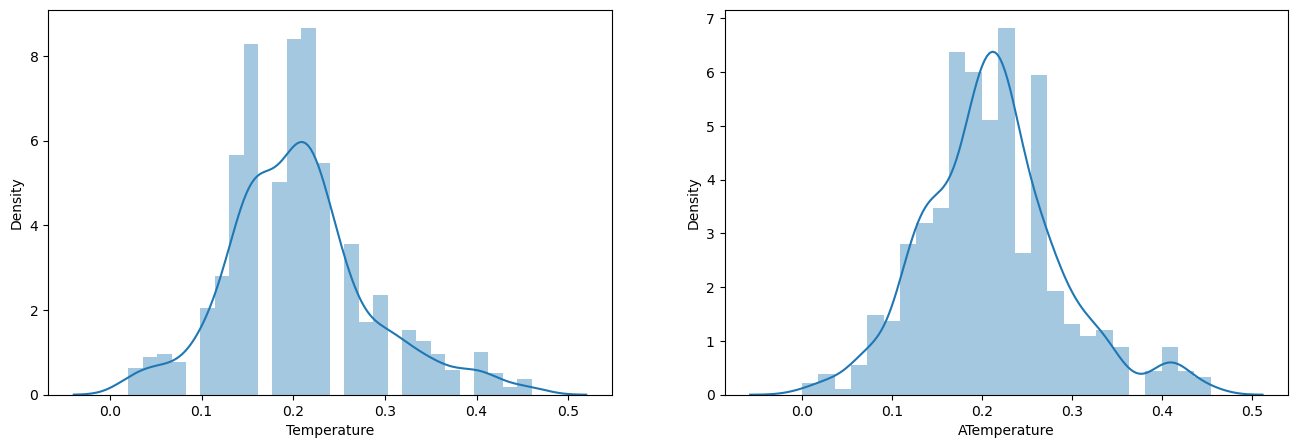

<Figure size 1600x500 with 0 Axes>

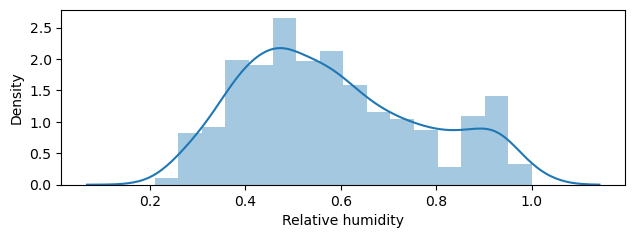

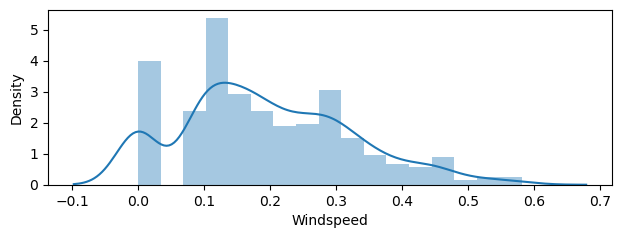

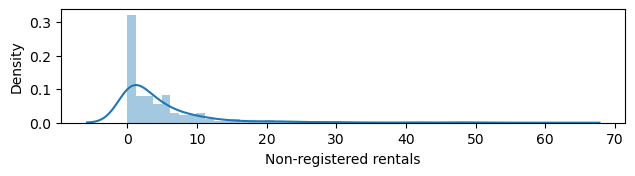

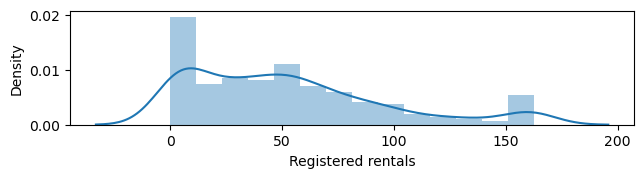

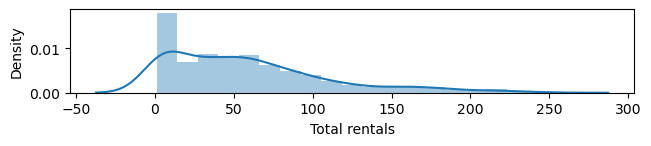

In [1606]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(merged_df2['Temperature'])

plt.subplot(1,2,2)
sns.distplot(merged_df2['ATemperature'])
plt.figure(figsize=(16,5))

plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(merged_df2['Relative humidity'])

plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
sns.distplot(merged_df2['Windspeed'])

plt.figure(figsize=(16,5))
plt.subplot(3,2,1)
sns.distplot(merged_df2['Non-registered rentals'])

plt.figure(figsize=(16,5))
plt.subplot(3,2,2)
sns.distplot(merged_df2['Registered rentals'])

plt.figure(figsize=(16,5))
plt.subplot(4,2,1)
sns.distplot(merged_df2['Total rentals'])

plt.show()


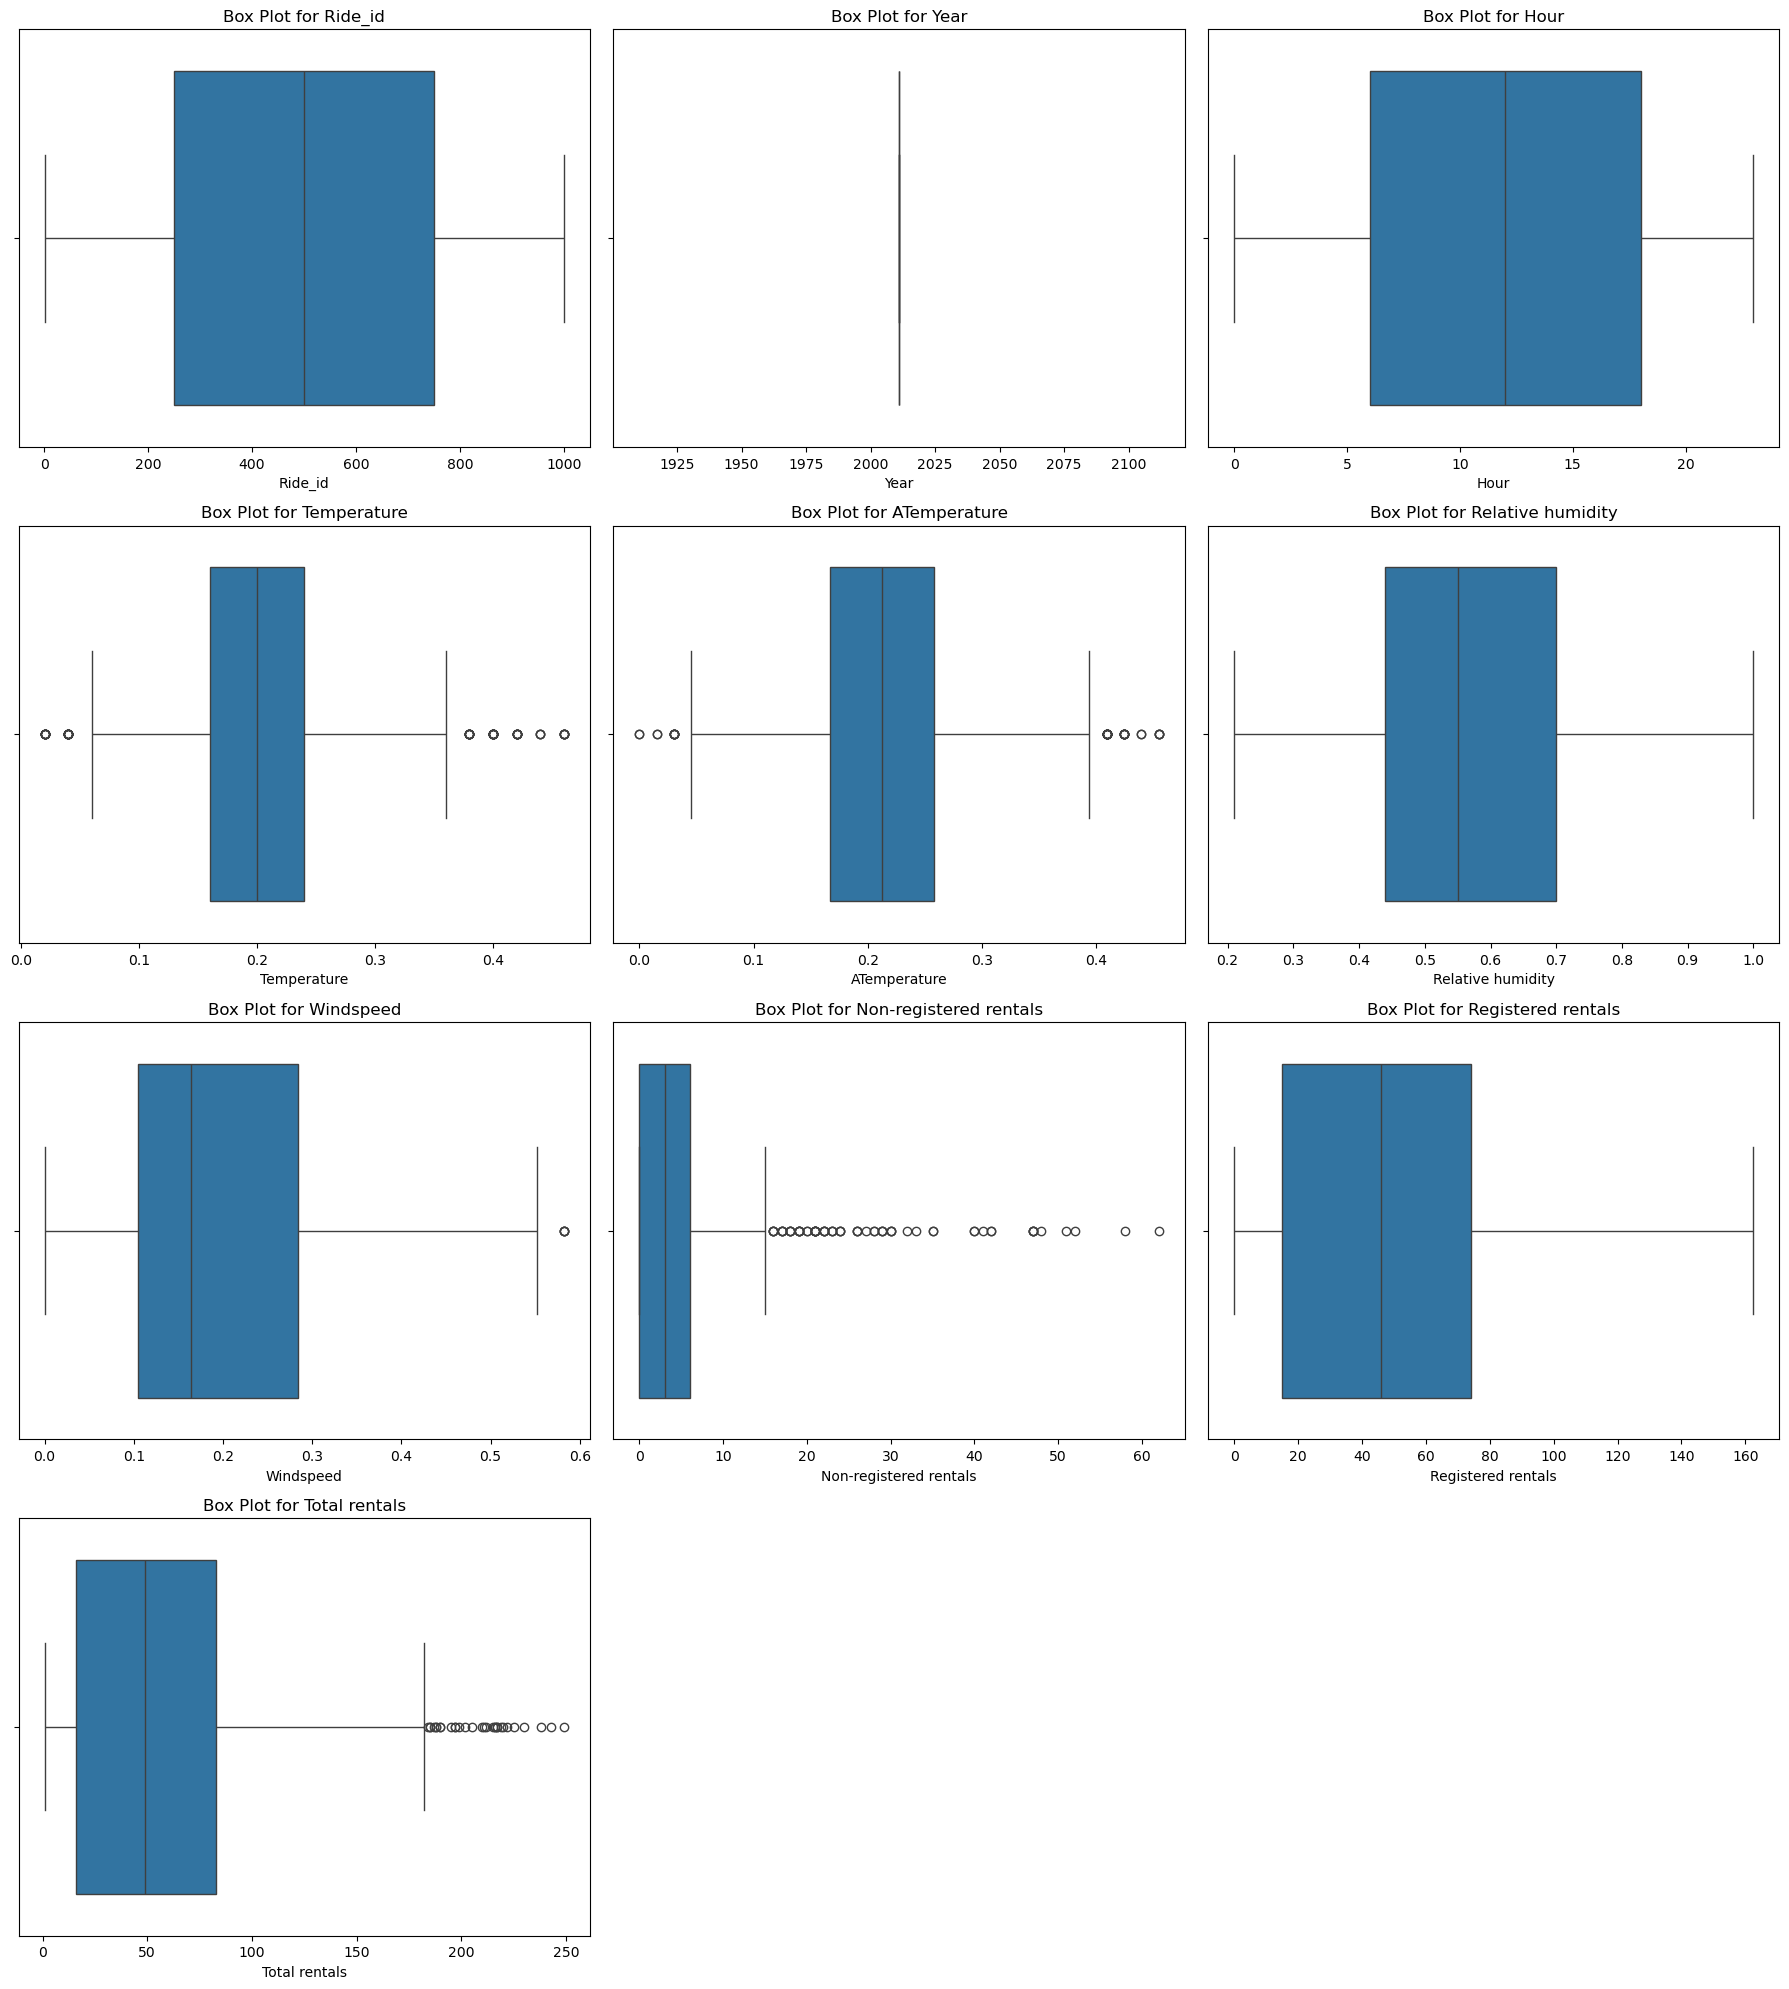

In [1607]:
# Set the number of rows and columns for the plot
num_columns = merged_df2.select_dtypes(include=['float64', 'int64']).columns  # Selecting numerical columns
num_plots = len(num_columns)

# Set up the number of rows and columns for the subplots
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Assuming you want 3 columns per row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop over the numerical columns and create a box plot for each
for i, col in enumerate(num_columns):
    sns.boxplot(data=merged_df2, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

# Hide empty subplots if any
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


## Removing outliers: 

In [1611]:
# Assuming df4 is your dataset
numerical_columns = merged_df2.select_dtypes(include=['float64', 'int64']).columns

# Create a mask to filter out the rows that contain outliers
for column in numerical_columns:
    Q1 = merged_df2[column].quantile(0.25)
    Q3 = merged_df2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the conditions for valid data (within the IQR range)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    merged_df2 = merged_df2[(merged_df2[column] >= lower_bound) & (merged_df2[column] <= upper_bound)]

# Now merged_df2 will have the outliers removed
print(merged_df2.head(10))


   Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
4        5  01-01-2011      Spring  2011  January     4     True  Saturday   
5        6  01-01-2011      Spring  2011  January     5     True  Saturday   
6        7  01-01-2011      Spring  2011  January     6     True  Saturday   
7        8  01-01-2011      Spring  2011  January     7     True  Saturday   
8        9  01-01-2011      Spring  2011  January     8     True  Saturday   
9       10  01-01-2011      Spring  2011  January     9     True  Saturday   

                Weather  Temperature  ATemperature  Relative humidity  \
0  Clear, Partly cloudy         0.24      0.287900               0.8

In [1612]:
# Assuming df4 is your DataFrame and it contains numerical columns
numerical_columns = merged_df2.select_dtypes(include=['float64', 'int64']).columns

# Define a threshold for identifying outliers using IQR (Interquartile Range)
threshold = 1.5  # The default for IQR is 1.5

# Iterate through each numerical column
for column in numerical_columns:
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = merged_df2[column].quantile(0.25)
    Q3 = merged_df2[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the bounds for detecting outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Find outliers (values outside the bounds)
    outliers = (merged_df2[column] < lower_bound) | (merged_df2[column] > upper_bound)
    
    # Replace outliers with the median
    median = merged_df2[column].median()
    merged_df2[column] = merged_df2[column].where(~outliers, median)

# Check the first few rows of the updated DataFrame
print(merged_df2.head())


   Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
4        5  01-01-2011      Spring  2011  January     4     True  Saturday   

                Weather  Temperature  ATemperature  Relative humidity  \
0  Clear, Partly cloudy         0.24        0.2879               0.81   
1  Clear, Partly cloudy         0.22        0.2727               0.80   
2  Clear, Partly cloudy         0.22        0.2727               0.80   
3  Clear, Partly cloudy         0.24        0.2879               0.75   
4  Clear, Partly cloudy         0.24        0.2879               0.75   

   Windspeed  Non-registered rentals  Registered rentals  Total rentals  
0        0.0      

In [1613]:
merged_df2.isnull().sum()/merged_df2.shape[0]*100

Ride_id                   0.0
Date                      0.0
Season_type               0.0
Year                      0.0
Month                     0.0
Hour                      0.0
Holiday                   0.0
Weekday                   0.0
Weather                   0.0
Temperature               0.0
ATemperature              0.0
Relative humidity         0.0
Windspeed                 0.0
Non-registered rentals    0.0
Registered rentals        0.0
Total rentals             0.0
dtype: float64

In [1615]:
merged_df2.duplicated().sum()

0

In [1617]:
#identifying the garbage values
for i in merged_df2.select_dtypes(include="object").columns:
    print(merged_df2[i].value_counts())
    print("**"*10)

Date
05-02-2011    24
08-01-2011    24
09-01-2011    24
17-01-2011    23
08-02-2011    22
13-01-2011    22
10-01-2011    22
31-01-2011    22
28-01-2011    22
03-02-2011    21
20-01-2011    21
11-01-2011    21
12-01-2011    21
01-02-2011    21
14-01-2011    21
30-01-2011    21
04-02-2011    21
29-01-2011    21
02-02-2011    20
10-02-2011    20
09-02-2011    20
06-01-2011    20
05-01-2011    20
03-01-2011    20
07-01-2011    19
04-01-2011    18
15-01-2011    18
06-02-2011    17
07-02-2011    17
21-01-2011    17
12-02-2011    17
11-02-2011    17
16-01-2011    17
26-01-2011    16
25-01-2011    16
19-01-2011    16
24-01-2011    15
23-01-2011    14
22-01-2011    12
18-01-2011    12
02-01-2011    11
01-01-2011    10
13-02-2011     9
27-01-2011     8
14-02-2011     6
Name: count, dtype: int64
********************
Season_type
Spring    816
Name: count, dtype: int64
********************
Month
January     564
February    252
Name: count, dtype: int64
********************
Weekday
Saturday     126


In [1618]:
merged_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Ride_id,816.0,499.172794,280.789126,1.0000,250.7500,500.5000,742.5000,1000.0000
Year,816.0,2011.000000,0.000000,2011.0000,2011.0000,2011.0000,2011.0000,2011.0000
Hour,816.0,11.556373,7.166162,0.0000,5.0000,11.0000,18.0000,23.0000
Temperature,816.0,0.192181,0.048740,0.0800,0.1600,0.2000,0.2200,0.3000
ATemperature,816.0,0.202702,0.058102,0.0606,0.1629,0.2121,0.2424,0.3485
Relative humidity,816.0,0.596605,0.186453,0.2100,0.4500,0.5600,0.7400,1.0000
Windspeed,816.0,0.186208,0.127326,0.0000,0.1045,0.1642,0.2836,0.5522
Non-registered rentals,816.0,2.785539,3.036682,0.0000,0.0000,2.0000,4.0000,12.0000
Registered rentals,816.0,42.099265,33.205079,0.0000,11.0000,39.2500,62.0000,141.0000
Total rentals,816.0,45.843137,35.849753,1.0000,13.0000,43.0000,69.0000,153.0000


In [1619]:
merged_df2.describe(include="object")

,Date,Season_type,Month,Weekday,Weather
count,816,816,816,816,816
unique,45,1,2,7,4
top,05-02-2011,Spring,January,Saturday,"Clear, Partly cloudy"
freq,24,816,564,126,487


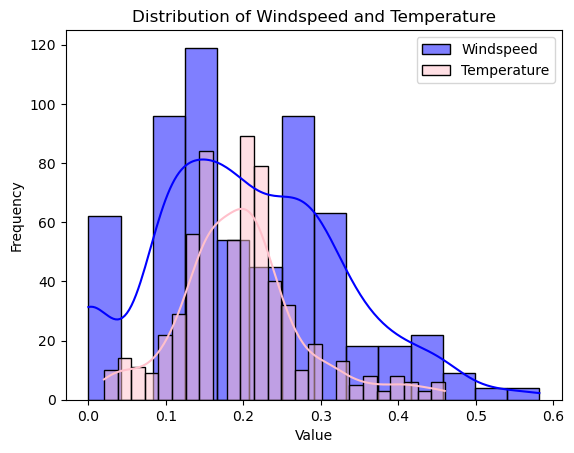

In [1620]:
sns.histplot(data=df, x="Windspeed", kde=True, color="blue", label="Windspeed")
sns.histplot(data=df, x="Temperature", kde=True, color="pink", label="Temperature")
plt.legend()
plt.title("Distribution of Windspeed and Temperature")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [1625]:
merged_df2.select_dtypes(include="number").columns

Index(['Ride_id', 'Year', 'Hour', 'Temperature', 'ATemperature',
       'Relative humidity', 'Windspeed', 'Non-registered rentals',
       'Registered rentals', 'Total rentals'],
      dtype='object')

In [1638]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=merged_df2.select_dtypes(include="number").corr()

<Axes: >

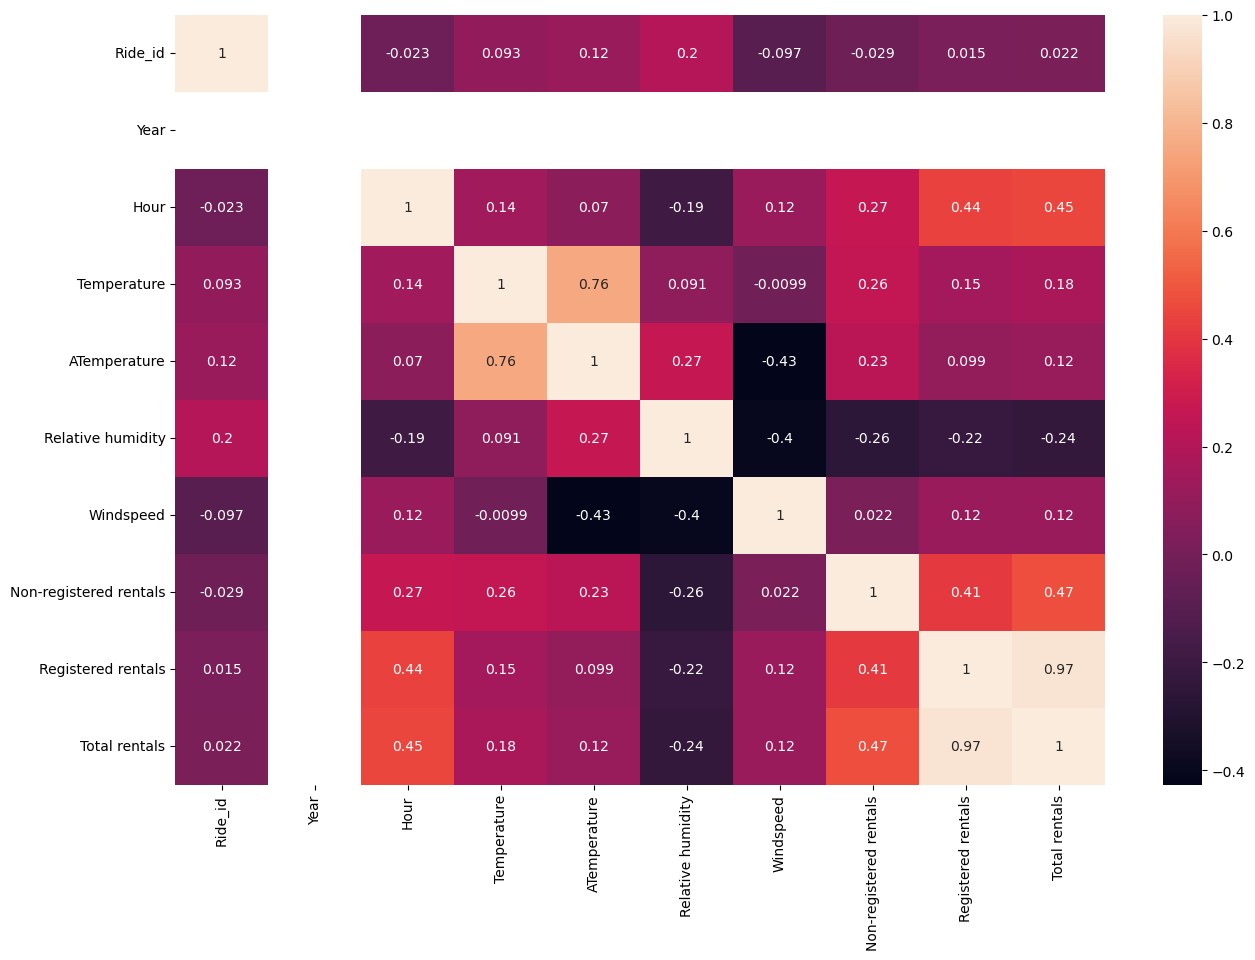

In [1648]:
plt.figure(figsize=(15,10))
sns.heatmap(s,annot=True)

In [1650]:
# Define the whisker function
def wisker(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

# Create a new column to flag outliers
for i in ['Temperature', 'ATemperature', 'Relative humidity', 'Windspeed']:
    lw, uw = wisker(merged_df2[i])
    merged_df2[f'{i}_outlier'] = np.where((merged_df2[i] < lw) | (merged_df2[i] > uw), True, False)

# Check the flagged outliers
print(merged_df2[[col for col in merged_df2.columns if 'outlier' in col]].sum())


Temperature_outlier          0
ATemperature_outlier         0
Relative humidity_outlier    0
Windspeed_outlier            0
dtype: int64


In [1651]:
#Exclude non-numeric columns:
numeric_data=merged_df2.select_dtypes(include=[float,int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                         Ride_id  Year      Hour  Temperature  ATemperature  \
Ride_id                 1.000000   NaN -0.023006     0.093459      0.123270   
Year                         NaN   NaN       NaN          NaN           NaN   
Hour                   -0.023006   NaN  1.000000     0.143291      0.069879   
Temperature             0.093459   NaN  0.143291     1.000000      0.757260   
ATemperature            0.123270   NaN  0.069879     0.757260      1.000000   
Relative humidity       0.203580   NaN -0.190336     0.091398      0.268313   
Windspeed              -0.097377   NaN  0.121192    -0.009872     -0.426660   
Non-registered rentals -0.028770   NaN  0.268071     0.257586      0.228979   
Registered rentals      0.015253   NaN  0.441990     0.154247      0.098769   
Total rentals           0.021663   NaN  0.452685     0.179864      0.117146   

                        Relative humidity  Windspeed  Non-registered rentals  \
Ride_id                          0.203580  -0.0973

In [1652]:
from scipy.stats import skew

# Analyze skewness for numerical columns
for col in numerical_cols:
    skewness = skew(merged_df2[col])
    print(f"Skewness of {col}: {skewness}")
import warnings
warnings.filterwarnings("ignore")

Skewness of Ride_id: 0.009893198962079311
Skewness of Year: nan
Skewness of Hour: 0.014456328375505275
Skewness of Temperature: 0.01479555599594332
Skewness of ATemperature: 0.018396479577750056
Skewness of Relative humidity: 0.3907262033593325
Skewness of Windspeed: 0.47361494737489906
Skewness of Non-registered rentals: 1.2056405741033176
Skewness of Registered rentals: 0.6913287130043949
Skewness of Total rentals: 0.6532498272744123


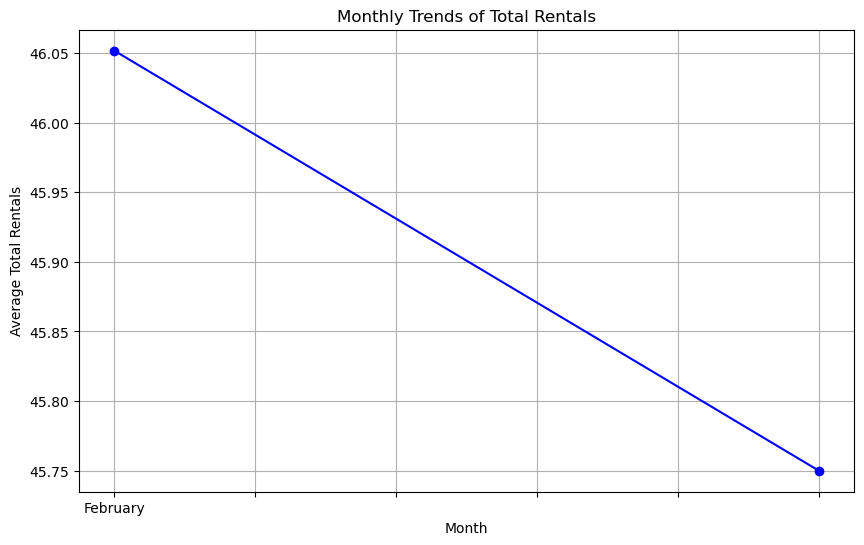

In [1663]:
# Group by month and calculate average rentals
monthly_trends = merged_df2.groupby('Month')['Total rentals'].mean()

# Line Chart for monthly trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(marker='o', color='b')
plt.title("Monthly Trends of Total Rentals")
plt.xlabel("Month")
plt.ylabel("Average Total Rentals")
plt.grid()
plt.show()


### After preprocessing all three datas importing data into excel file:

In [1676]:
# Set index=False to not save row indices
from IPython.display import FileLink
merged_df2.to_excel('final_cleaned_dataset.xlsx', index=False) 
FileLink('final_cleaned_dataset.xlsx')

C:\Users\Admin\NEXTHIKES PROJECT\final_cleaned_dataset.xlsx